In [91]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)



df = pd.read_csv('hotel_booking.csv')
#df.info()

In [108]:
pd.set_option('display.width', 200)

In [93]:
help(pd.set_option)

Help on CallableDynamicDoc in module pandas._config.config:

<pandas._config.config.CallableDynamicDoc object>
    set_option(pat, value)
    
    Sets the value of the specified option.
    
    Available options:
    
    - compute.[use_bottleneck, use_numba, use_numexpr]
    - display.[chop_threshold, colheader_justify, column_space, date_dayfirst,
      date_yearfirst, encoding, expand_frame_repr, float_format]
    - display.html.[border, table_schema, use_mathjax]
    - display.[large_repr]
    - display.latex.[escape, longtable, multicolumn, multicolumn_format, multirow,
      repr]
    - display.[max_categories, max_columns, max_colwidth, max_dir_items,
      max_info_columns, max_info_rows, max_rows, max_seq_items, memory_usage,
      min_rows, multi_sparse, notebook_repr_html, pprint_nest_depth, precision,
      show_dimensions]
    - display.unicode.[ambiguous_as_wide, east_asian_width]
    - display.[width]
    - io.excel.ods.[reader, writer]
    - io.excel.xls.[reader, writ

In [3]:
pd.set_option('display.max_columns', None)
df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190


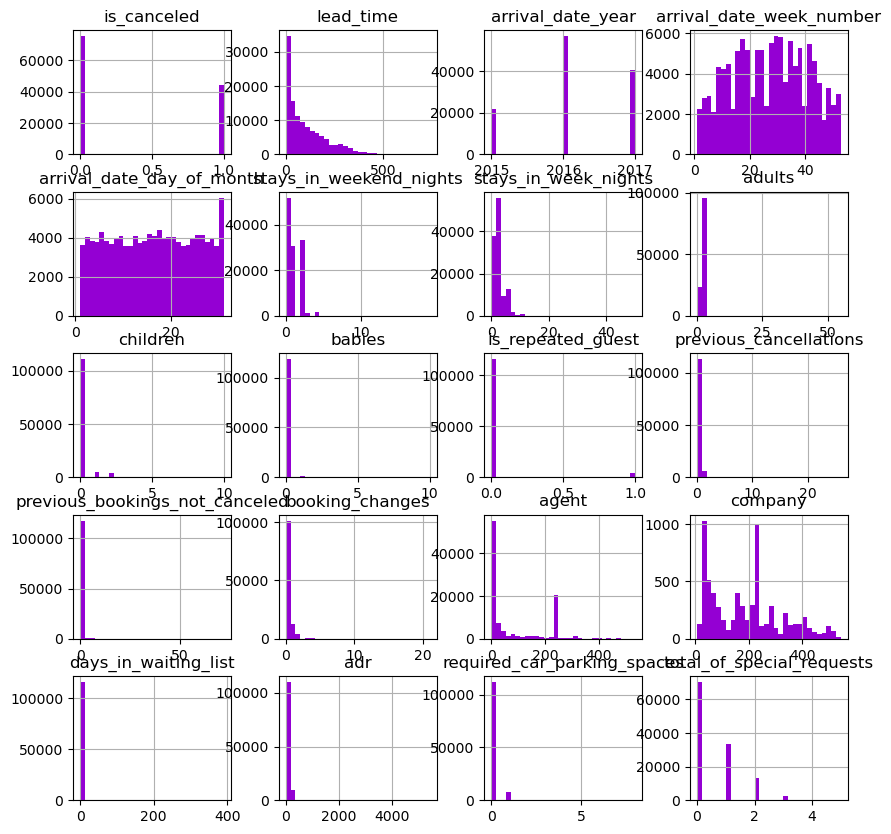

In [4]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(10,10),color='darkviolet')
plt.show()

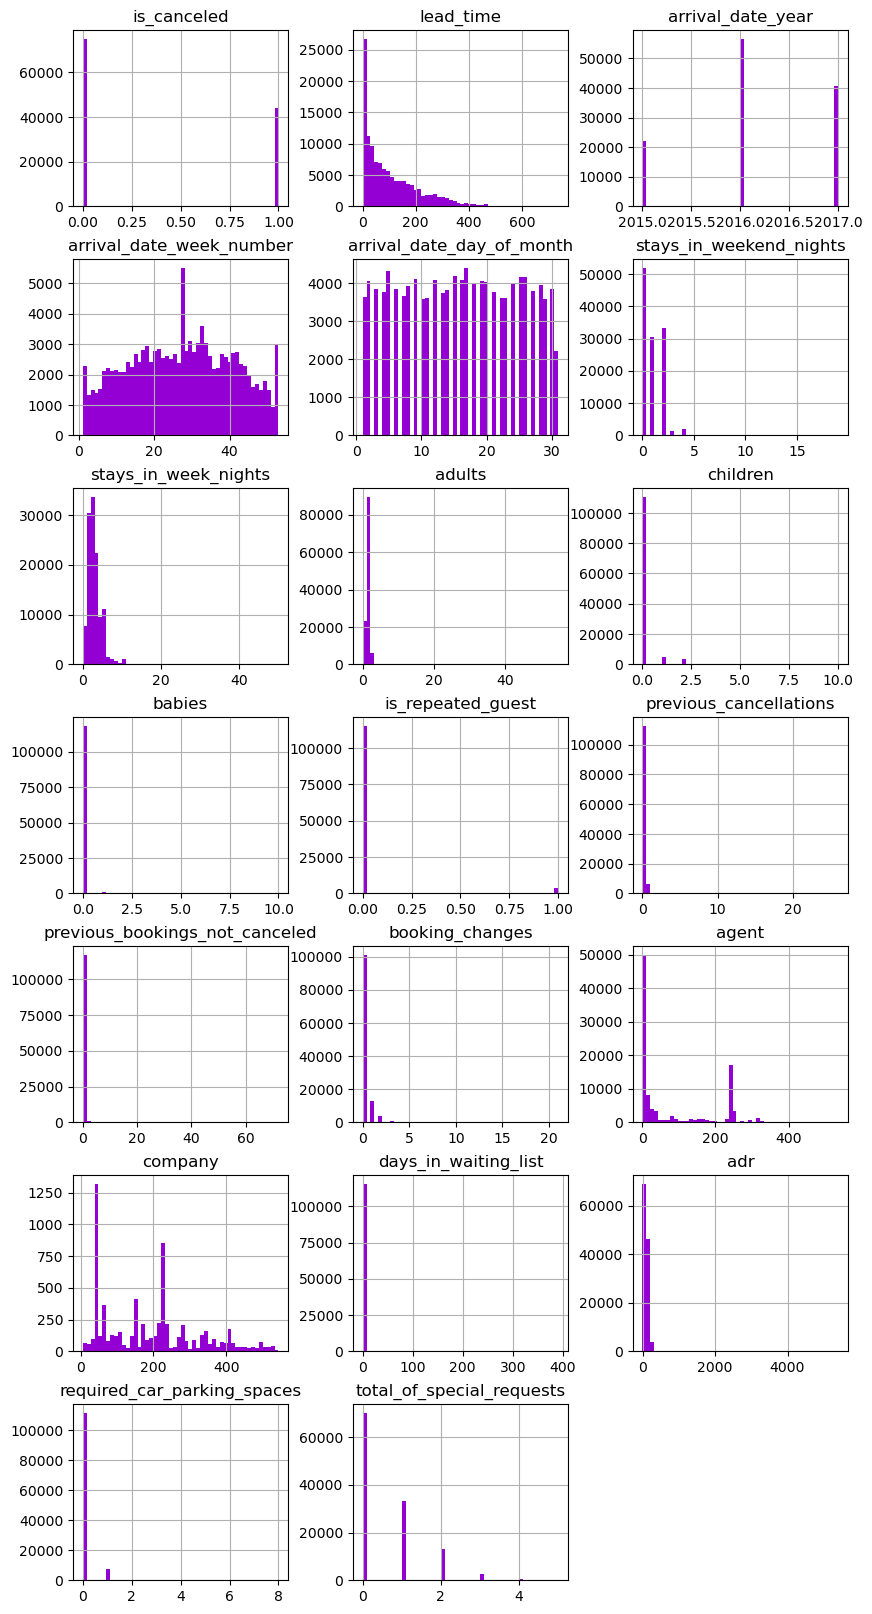

In [5]:
import matplotlib.pyplot as plt

# Plot histograms
df.hist(bins=50, figsize=(10, 35), color='darkviolet', layout=(12, 3))
plt.show()

In [6]:
#Fill Null values
df['country'].fillna('Other', inplace=True)

# Calculate cancellation ratio for each country
cancellation_ratio = df.groupby('country')['is_canceled'].mean()

# Map cancellation ratio to each country in the 'country' column
df['country_ratio'] = df['country'].map(cancellation_ratio)

top_countries = df['country'].value_counts().nlargest(9).index.tolist()

# Replace countries not in the top 9 with 'Other'
df['country'] = df['country'].apply(lambda x: x if x in top_countries else 'Other')

# Now proceed with the preprocessing pipeline as before...
df.head(10)
#country_cancel_counts = pd.crosstab(df['country'], df['is_canceled'])


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,country_ratio
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0.566351
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0.566351
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,0.202243
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,0.202243
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,0.202243
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,Jasmine Fletcher,JFletcher43@xfinity.com,190-271-6743,************9263,0.202243
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03,Dylan Rangel,Rangel.Dylan@comcast.net,420-332-5209,************6994,0.566351
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03,William Velez,Velez_William@mail.com,286-669-4333,************8729,0.566351
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06,Steven Murphy,Steven.Murphy54@aol.com,341-726-5787,************3639,0.566351
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22,Michael Moore,MichaelMoore81@outlook.com,316-648-6176,************9190,0.566351


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
import shap


# Define column lists
numerical_cols = ['lead_time']
numerical_cols_scaling = ['adr']
impute_cols = ['children', 'agent', 'company']
frequent_impute_cols = ['country', 'arrival_date_month']
constant_impute_cols = ['meal']
categorical_cols = ['hotel', 'market_segment', 
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'customer_type']
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card', 'reservation_status_date', 'reservation_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.2, random_state=1)


class Debugger(BaseEstimator, TransformerMixin):

    def transform(self, data):

        # Here you just print what you need + return the actual data. You're not transforming anything. 

        print("Shape of Pre-processed Data:", data.shape)
        print(pd.DataFrame(data).head())
        return data

    def fit(self, data, y=None, **fit_params):

        # No need to fit anything, because this is not an actual  transformation. 

        return self


class FarBook(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Create the 'farbook' feature based on lead_time
        X['farbook'] = (X['lead_time'] > 7).astype(int)
        # Drop the 'lead_time' column
        X.drop(columns=['lead_time'], inplace=True)
        return X
    
# Define preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler())
])

numerical_scaling_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    #,('debugger', Debugger())
])

specific_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

frequent_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

constant_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create column transformer to apply pipelines to appropriate columns
preprocessor = ColumnTransformer([
    ('farbook', FarBook(), ['lead_time']),
    ('numerical', numerical_pipeline, numerical_cols),
    ('numerical_scaling', numerical_scaling_pipeline, numerical_cols_scaling),
    ('specific_impute', specific_impute_pipeline, impute_cols),
    ('frequent_impute', frequent_impute_pipeline, frequent_impute_cols),
    ('constant_impute', constant_impute_pipeline, constant_impute_cols),
    ('categorical', categorical_pipeline, categorical_cols),
    ('drop_columns', 'drop', columns_to_drop)
], remainder="passthrough")

'''
# to debug the transformed data, use this    
# Fit and transform the data
# X_preprocessed = preprocessor.fit_transform(df)
# X_preprocessed
    
# Null values check
columns_with_nan = X_preprocessed.columns[X_preprocessed.isna().any()].tolist()
rows_with_nan = X_preprocessed[X_preprocessed.isna().any(axis=1)]
print("Columns with NaN values:", columns_with_nan)
print("Rows with NaN values:")
rows_with_nan.head()
'''

# Create a logistic regression model
logistic_regression_model = LogisticRegression()


# Define the pipeline with preprocessing and logistic regression
pipeline_with_logistic_regression = Pipeline([
    ('preprocessor', preprocessor),
    #('debugger', Debugger()),
    ('logistic_regression', logistic_regression_model)
])

# Fit the pipeline on the training data
pipeline_with_logistic_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('farbook', FarBook(),
                                                  ['lead_time']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer())]),
                                                  ['lead_time']),
                                                 ('numerical_scaling',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['adr']),
                                                 ('specific_impute',
                                                  Pipeline(steps=[('imputer',
                                                                   Si...
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['hotel', 'market_segment',
                                                   'distribution_channel',
                                                   'reserved_room_type',
                                                   'assigned_room_type',
                                                   'deposit_type',
                                                   'customer_type']),
                                                 ('drop_columns', 'drop',
                                                  ['name', 'email',
                                                   'phone-number',
                                                   'credit_card',
                                                   'reservation_status_date',
                                                   'reservation_status'])])),
                ('logistic_regression', LogisticRegression())])

In [8]:
def fit_eval_model(model):
    # Fit the pipeline to the training data
    print('Fitting the model')
    best_params = ''
    try:
        model.fit(X_train, y_train, classifier__verbose = 0)
    except:
        model.fit(X_train, y_train)
    
    try:
        # Extract the best estimator if GridSearchCV is used
        best_score = model.best_score_
        print(f"Best parameters: {model.best_params_}")
        print(f"Best cross-validation accuracy: {best_score}")
        print("")
        #model = model.best_estimator_
        best_params = model.best_params_
    except AttributeError:
        pass

    
    # Get predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy : {accuracy}")

    # Compute classification report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report:\n{report}\n")
    
    return model, y_pred, accuracy, report, best_params

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression()
    ,'Random Forest': RandomForestClassifier()
    ,'SGDClassifier': SGDClassifier()
    ,'KNN': KNeighborsClassifier()
    ,'Naive Bayes': GaussianNB()
    #,'SVM': SVC()
    ,'Decision Tree': DecisionTreeClassifier()
    ,'XGBoost': XGBClassifier()
    ,'LightGBM': LGBMClassifier()
    ,'CatBoost': CatBoostClassifier()
    ,'AdaBoost': AdaBoostClassifier()
    ,'Bagging Classifier': BaggingClassifier()
}
results = {}
# Fit and evaluate each classifier
for name, classifier in classifiers.items():
    print(f"Training and evaluating {name}...")
    
    # Create a pipeline for the current classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    k = fit_eval_model(pipeline)    
    results[name] = k

print('Accuracy   | Model')
for i in results.keys():
    print(" ",round(results[i][2],2), "    |", i)

Training and evaluating Logistic Regression...
Fitting the model
Accuracy : 0.787880056956194
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85     15101
           1       0.80      0.57      0.66      8777

    accuracy                           0.79     23878
   macro avg       0.79      0.74      0.75     23878
weighted avg       0.79      0.79      0.78     23878


Training and evaluating Random Forest...
Fitting the model
Accuracy : 0.8968087779546026
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     15101
           1       0.89      0.83      0.85      8777

    accuracy                           0.90     23878
   macro avg       0.89      0.88      0.89     23878
weighted avg       0.90      0.90      0.90     23878


Training and evaluating SGDClassifier...
Fitting the model
Accuracy : 0.7151771505151185
Classification Report:
   

In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time


start_time = time.time()
# Define parameter grids for each classifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.99, random_state=1)

classifiers_param_grids = {
'XGBoost': [XGBClassifier(n_jobs=-1),{
    'classifier__eta': [0.1,0.2, 0.3, 0.5],
    'classifier__max_depth': [4,5,6,7,8],
    'classifier__min_child_weight': [1, 3, 5], 
    'classifier__subsample': [0.5, 0.8, 1.0],
    'classifier__colsample_bytree': [0.5, 0.8, 1.0]
}]
}


classifiers_param_grids_base = {
    'Logistic Regression': [LogisticRegression(),{
        'classifier__C': [1, 10]
        ,'classifier__solver': ['newton-cholesky','liblinear']
        ,'classifier__penalty': ['l1', 'l2']
        ,'classifier__class_weight': [None, 'balanced']
    }],
    'Random Forest': [RandomForestClassifier(n_jobs=-1),{
     'classifier__n_estimators': [100],
     'classifier__criterion': ['log_loss'], #['gini', 'entropy', 'log_loss'],
     'classifier__max_features': [0.2], #, 'sqrt'], #['sqrt', 'log2', 0.2],
     'classifier__oob_score': [True], #['sqrt', 'log2', 0.2],
     'classifier__min_samples_leaf': [1], #['sqrt', 'log2', 0.2],
    
   # 'classifier__max_depth': [None],
   # 'classifier__min_samples_split': [2,4],
   # 'classifier__bootstrap': [True, False],
   # 'classifier__max_samples': [None, 0.9],
   # 'classifier__min_samples_leaf': [2,4]
}],
#    'SGDClassifier': [SGDClassifier(),{'classifier__alpha': [0.001, 0.01, 0.05, 0.1]}],
    'XGBoost': [XGBClassifier(),{'classifier__max_depth': [3, 5, 7]}],
    'LightGBM': [LGBMClassifier(),{'classifier__max_depth': [3, 5, 7]}],
    'CatBoost': [CatBoostClassifier(),{'classifier__depth': [3, 5, 7]}],
    'Bagging Classifier': [BaggingClassifier(),{'classifier__n_estimators': [2, 5,10, 15]}]
}

results_grid = {}
# Perform GridSearchCV for each classifier
for name, classifier in classifiers_param_grids.items():
    print(f"Training and optimizing {name}...")
    
    # Create a pipeline for the current classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier[0])
    ])
    
    # Perform GridSearchCV
    #grid_search = GridSearchCV(pipeline, classifiers_param_grids[name][1], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search = RandomizedSearchCV(pipeline, classifiers_param_grids[name][1], cv=5, n_iter = 20 ,scoring='accuracy', n_jobs=-1)


    # Evaluate the best model using the fit_eval_pipeline function
    k = fit_eval_model(grid_search)
    results_grid[name] = k

print("Elapsed time:", time.time()-start_time, "seconds")    
print('Accuracy   | Model')
for i in results_grid.keys():
    print(" ",round(results_grid[i][2],2), "    |", i)

Training and optimizing XGBoost...
Fitting the model
Best parameters: {'classifier__subsample': 1.0, 'classifier__min_child_weight': 1, 'classifier__max_depth': 8, 'classifier__eta': 0.1, 'classifier__colsample_bytree': 1.0}
Best cross-validation accuracy: 0.8348757076052177

Accuracy : 0.8382361650464902
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     74406
           1       0.81      0.73      0.77     43791

    accuracy                           0.84    118197
   macro avg       0.83      0.82      0.82    118197
weighted avg       0.84      0.84      0.84    118197


Elapsed time: 28.989749431610107 seconds
Accuracy   | Model
  0.84     | XGBoost


In [120]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time


start_time = time.time()
# Define parameter grids for each classifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.75, random_state=1)


#n_estimators=50
classifiers_param_grids = {
    'LightGBM': [LGBMClassifier(),{
        'classifier__num_leaves': Integer(30, 40),
        'classifier__boosting': ['dart','gbdt'], #'gbdt','rf',
        'classifier__data_sample_strategy': ['bagging'], #,'goss'],
        'classifier__max_depth': Integer(5, 15),
        'classifier__learning_rate': Real(0.01, 0.4, prior = 'log-uniform'),
        'classifier__n_estimators': Integer(30, 200, prior = 'log-uniform'),
        'classifier__subsample': Real(0.1, 1.0),
        'classifier__colsample_bytree': Real(0.8, 1.0),
        'classifier__min_child_samples': Integer(10, 30),
        'classifier__reg_alpha': Real(0.0001, 1.0, prior = 'log-uniform'),
        'classifier__reg_lambda': Real(0.0001, 1.0, prior = 'log-uniform'),
        'classifier__min_split_gain': Real(0.0001, 1.0, prior = 'log-uniform'),
        'classifier__min_child_weight': Real(0.0001, 100, prior = 'log-uniform'),
        'classifier__min_data_in_leaf': Integer(5, 30)
}]
    

}


classifiers_param_grids_base = {
    'Logistic Regression': [LogisticRegression(),{
        'classifier__C': [1, 10]
        ,'classifier__solver': ['newton-cholesky','liblinear']
        ,'classifier__penalty': ['l1', 'l2']
        ,'classifier__class_weight': [None, 'balanced']
    }],
    'Random Forest': [RandomForestClassifier(n_jobs=-1),{
     'classifier__n_estimators': [100],
     'classifier__criterion': ['log_loss'], #['gini', 'entropy', 'log_loss'],
     'classifier__max_features': [0.2], #, 'sqrt'], #['sqrt', 'log2', 0.2],
     'classifier__oob_score': [True], #['sqrt', 'log2', 0.2],
     'classifier__min_samples_leaf': [1], #['sqrt', 'log2', 0.2],
    
   # 'classifier__max_depth': [None],
   # 'classifier__min_samples_split': [2,4],
   # 'classifier__bootstrap': [True, False],
   # 'classifier__max_samples': [None, 0.9],
   # 'classifier__min_samples_leaf': [2,4]
}],
#    'SGDClassifier': [SGDClassifier(),{'classifier__alpha': [0.001, 0.01, 0.05, 0.1]}],
    'XGBoost': [XGBClassifier(n_jobs=-1),{
    'classifier__eta': Real(0.1, 0.29), #[0.1,0.2, 0.3, 0.5] 
    'classifier__max_depth': Integer(10, 100),
    'classifier__min_child_weight': Integer(1, 2), 
    'classifier__subsample': Real(0.01, 1.0), #[0.5, 0.8, 1.0],
    'classifier__colsample_bytree': Real(0.01, 1.0), #[0.5, 0.8, 1.0]
}],
    'LightGBM': [LGBMClassifier(),{'classifier__max_depth': [3, 5, 7]}],
    'CatBoost': [CatBoostClassifier(),{'classifier__learning_rate': [0.25], #Real(0.2, 0.99),
                                                      'classifier__iterations': Integer(10, 1000, prior = 'log-uniform'),
                                                      #'classifier__depth': Integer(5, 15),
                                                      #'classifier__l2_leaf_reg': Integer(3, 20),
                                                      'classifier__loss_function': ['Logloss', 'CrossEntropy'], #'Logloss',
                                                      #'classifier__eval_metric': ['Accuracy','AUC'], #'Accuracy', 
                                                      #'classifier__bootstrap_type': ['Bayesian', 'Bernoulli', 'MVS'],  # Bootstrap type
                                                      #'classifier__langevin': [True, False],
                                                      #'classifier__leaf_estimation_iterations' : Integer(1, 10)
                                      }],
    'Bagging Classifier': [BaggingClassifier(),{'classifier__n_estimators': [2, 5,10, 15]}]
}

results_grid = {}
# Perform GridSearchCV for each classifier
for name, classifier in classifiers_param_grids.items():
    print(f"Training and optimizing {name}...")
    
    # Create a pipeline for the current classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier[0])
    ])
    
    # Perform GridSearchCV
    #grid_search = GridSearchCV(pipeline, classifiers_param_grids[name][1], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search = BayesSearchCV(pipeline, classifiers_param_grids[name][1], cv=3, n_iter = 30 ,scoring='accuracy', n_jobs=-1, verbose=3)


    # Evaluate the best model using the fit_eval_pipeline function
    k = fit_eval_model(grid_search)
    results_grid[name] = k

print("Elapsed time:", time.time()-start_time, "seconds")    
print('Accuracy   | Model')
for i in results_grid.keys():
    print(" ",round(results_grid[i][2],2), "    |", i)

Training and optimizing LightGBM...
Fitting the model
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fi

In [124]:
pr = pd.DataFrame(k[0].cv_results_).sort_values(by='rank_test_score')
pr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier__boosting,param_classifier__colsample_bytree,param_classifier__data_sample_strategy,param_classifier__learning_rate,param_classifier__max_depth,param_classifier__min_child_samples,param_classifier__min_child_weight,param_classifier__min_data_in_leaf,param_classifier__min_split_gain,param_classifier__n_estimators,param_classifier__num_leaves,param_classifier__reg_alpha,param_classifier__reg_lambda,param_classifier__subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
16,6.611987,0.599062,0.139965,0.019394,dart,1.0,bagging,0.264083,15,23,0.248679,5,0.0001,175,30,0.000304,0.000104,1.0,"{'classifier__boosting': 'dart', 'classifier__...",0.873555,0.873053,0.868831,0.871813,0.002118,1
28,1.079000,0.398161,0.204302,0.095253,gbdt,0.884754,bagging,0.4,15,21,0.001286,5,0.000277,61,40,1.0,1.0,0.1,"{'classifier__boosting': 'gbdt', 'classifier__...",0.872751,0.872248,0.868328,0.871109,0.001977,2
0,0.708390,0.009031,0.082334,0.002625,gbdt,0.971772,bagging,0.189652,13,13,0.003615,11,0.000183,71,40,0.00485,0.362178,0.479829,"{'classifier__boosting': 'gbdt', 'classifier__...",0.873254,0.871444,0.868429,0.871042,0.001990,3
3,3.485993,0.247671,0.135585,0.018601,gbdt,0.861886,bagging,0.250717,11,27,0.000137,28,0.078438,118,35,0.205205,0.243737,0.646241,"{'classifier__boosting': 'gbdt', 'classifier__...",0.875364,0.869032,0.868731,0.871042,0.003059,3
22,2.285533,0.403994,0.138362,0.019586,dart,0.879879,bagging,0.4,13,20,0.0001,15,0.0001,91,30,0.000109,0.0001,0.345241,"{'classifier__boosting': 'dart', 'classifier__...",0.873053,0.871243,0.868127,0.870808,0.002034,5
17,1.264681,0.515737,0.115335,0.025487,dart,0.85171,bagging,0.211249,10,24,0.0001,15,0.0001,64,40,0.005608,0.000649,1.0,"{'classifier__boosting': 'dart', 'classifier__...",0.874259,0.868429,0.867323,0.870004,0.003042,6
9,2.523957,0.232171,0.126323,0.022378,gbdt,0.911203,bagging,0.212215,13,13,0.516498,25,0.217736,80,33,0.113888,0.034074,0.645637,"{'classifier__boosting': 'gbdt', 'classifier__...",0.873656,0.871042,0.864911,0.869870,0.003665,7
29,1.362293,0.534367,0.112997,0.024342,gbdt,0.8,bagging,0.189289,15,30,0.0001,19,0.489648,128,40,0.042171,0.0001,0.107724,"{'classifier__boosting': 'gbdt', 'classifier__...",0.873455,0.870138,0.864610,0.869401,0.003648,8
21,3.578797,0.350339,0.171499,0.022396,gbdt,0.929674,bagging,0.4,9,30,0.000162,21,0.0001,200,30,0.069776,0.011708,0.131233,"{'classifier__boosting': 'gbdt', 'classifier__...",0.872852,0.869535,0.864911,0.869099,0.003256,9
23,3.390331,0.302374,0.135048,0.004116,dart,0.939743,bagging,0.375043,7,20,1.773376,8,0.815737,104,40,0.024567,0.000456,0.959246,"{'classifier__boosting': 'dart', 'classifier__...",0.870540,0.869233,0.865313,0.868362,0.002221,10


In [138]:
bestparams = dict(pr['params'][0])
bestparams

{'classifier__boosting': 'gbdt',
 'classifier__colsample_bytree': 0.9717716268250217,
 'classifier__data_sample_strategy': 'bagging',
 'classifier__learning_rate': 0.18965184229042872,
 'classifier__max_depth': 13,
 'classifier__min_child_samples': 13,
 'classifier__min_child_weight': 0.0036146655613112453,
 'classifier__min_data_in_leaf': 11,
 'classifier__min_split_gain': 0.00018333801391414855,
 'classifier__n_estimators': 71,
 'classifier__num_leaves': 40,
 'classifier__reg_alpha': 0.00485032208998268,
 'classifier__reg_lambda': 0.3621781369066794,
 'classifier__subsample': 0.4798293485980387}

In [122]:
print('Accuracy   | Model')
for i in results.keys():
    print(" ",round(results[i][2],3), "    |", i)

    
print('\n\n\nGrid Search CV Model Optimization\n') 
print('Accuracy   | Model - Best_Params')
for i in results_grid.keys():
    print(" ",round(results_grid[i][2],3), "    |", i, "", results_grid[i][4])

Accuracy   | Model
  0.788     | Logistic Regression
  0.897     | Random Forest
  0.715     | SGDClassifier
  0.792     | KNN
  0.726     | Naive Bayes
  0.857     | Decision Tree
  0.884     | XGBoost
  0.879     | LightGBM
  0.889     | CatBoost
  0.833     | AdaBoost
  0.886     | Bagging Classifier



Grid Search CV Model Optimization

Accuracy   | Model - Best_Params
  0.876     | LightGBM  OrderedDict([('classifier__boosting', 'dart'), ('classifier__colsample_bytree', 1.0), ('classifier__data_sample_strategy', 'bagging'), ('classifier__learning_rate', 0.26408280083193547), ('classifier__max_depth', 15), ('classifier__min_child_samples', 23), ('classifier__min_child_weight', 0.2486785207017058), ('classifier__min_data_in_leaf', 5), ('classifier__min_split_gain', 0.0001), ('classifier__n_estimators', 175), ('classifier__num_leaves', 30), ('classifier__reg_alpha', 0.00030380833268664584), ('classifier__reg_lambda', 0.00010408940049220265), ('classifier__subsample', 1.0)])


In [253]:
from sklearn.ensemble import StackingClassifier

# Stacking Classifier
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.2, random_state=1)


lr_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression()) #(class_weight = 'balanced', penalty ='l1', solver='newton-cholesky'))
         ])
    
cat_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', CatBoostClassifier())
    ])

lgbm_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LGBMClassifier())
    ])

xgb_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier())
    ])

rf_pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(oob_score = True, max_features = 0.2, criterion = 'log_loss'))
    ])


estimators_clf = [('lgbm_clf',lgbm_pipe),('xgb_clf',xgb_pipe),('rf_clf',rf_pipe),('lr_clf',lr_pipe),('cat_clf',cat_pipe)]

for name, estimator in estimators_clf:
    fit_eval_model(estimator)

Fitting the model
[LightGBM] [Info] Number of positive: 35447, number of negative: 60065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1504
[LightGBM] [Info] Number of data points in the train set: 95512, number of used features: 148
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371126 -> initscore=-0.527389
[LightGBM] [Info] Start training from score -0.527389
Accuracy : 0.877962978473909
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91     15101
           1       0.86      0.80      0.83      8777

    accuracy                           0.88     23878
   macro avg       0.87      0.86      0.87     23878
weighted avg       0.88      0.88      0.88     23878


Fitting the model
Accuracy : 0.880768908618

In [291]:
#clf = StackingClassifier(estimators=estimators_clf, final_estimator=LogisticRegression(), cv ='prefit')
clf = StackingClassifier(estimators=estimators_clf, final_estimator=LogisticRegression())#, cv ='prefit')

r = fit_eval_model(clf)

Fitting the model
[LightGBM] [Info] Number of positive: 35447, number of negative: 60065
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006586 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1504
[LightGBM] [Info] Number of data points in the train set: 95512, number of used features: 148
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.371126 -> initscore=-0.527389
[LightGBM] [Info] Start training from score -0.527389
Learning rate set to 0.07218
0:	learn: 0.6271125	total: 18.8ms	remaining: 18.8s
1:	learn: 0.5779096	total: 35.2ms	remaining: 17.6s
2:	learn: 0.5403957	total: 52.2ms	remaining: 17.3s
3:	learn: 0.5113794	total: 69.1ms	remaining: 17.2s
4:	learn: 0.4851007	total: 87ms	remaining: 17.3s
5:	learn: 0.4684447	total: 105ms	remaining: 17.3s
6:	learn: 0.4507119	total: 122ms	remaining: 17.3s
7:	learn: 0.4383128	total: 140ms	remainin

154:	learn: 0.2923652	total: 4.39s	remaining: 23.9s
155:	learn: 0.2921855	total: 4.42s	remaining: 23.9s
156:	learn: 0.2920541	total: 4.44s	remaining: 23.9s
157:	learn: 0.2918593	total: 4.47s	remaining: 23.8s
158:	learn: 0.2915868	total: 4.5s	remaining: 23.8s
159:	learn: 0.2914627	total: 4.52s	remaining: 23.8s
160:	learn: 0.2914039	total: 4.55s	remaining: 23.7s
161:	learn: 0.2907884	total: 4.58s	remaining: 23.7s
162:	learn: 0.2906854	total: 4.61s	remaining: 23.7s
163:	learn: 0.2904749	total: 4.65s	remaining: 23.7s
164:	learn: 0.2903996	total: 4.67s	remaining: 23.7s
165:	learn: 0.2902950	total: 4.7s	remaining: 23.6s
166:	learn: 0.2896723	total: 4.73s	remaining: 23.6s
167:	learn: 0.2893238	total: 4.77s	remaining: 23.6s
168:	learn: 0.2888388	total: 4.8s	remaining: 23.6s
169:	learn: 0.2886730	total: 4.83s	remaining: 23.6s
170:	learn: 0.2885399	total: 4.86s	remaining: 23.6s
171:	learn: 0.2882275	total: 4.89s	remaining: 23.6s
172:	learn: 0.2881505	total: 4.92s	remaining: 23.5s
173:	learn: 0.2

316:	learn: 0.2704391	total: 9.37s	remaining: 20.2s
317:	learn: 0.2704089	total: 9.39s	remaining: 20.1s
318:	learn: 0.2703443	total: 9.42s	remaining: 20.1s
319:	learn: 0.2702525	total: 9.45s	remaining: 20.1s
320:	learn: 0.2701645	total: 9.47s	remaining: 20s
321:	learn: 0.2701102	total: 9.5s	remaining: 20s
322:	learn: 0.2700256	total: 9.52s	remaining: 20s
323:	learn: 0.2699477	total: 9.55s	remaining: 19.9s
324:	learn: 0.2698824	total: 9.57s	remaining: 19.9s
325:	learn: 0.2698507	total: 9.6s	remaining: 19.9s
326:	learn: 0.2698458	total: 9.63s	remaining: 19.8s
327:	learn: 0.2697670	total: 9.65s	remaining: 19.8s
328:	learn: 0.2696180	total: 9.68s	remaining: 19.7s
329:	learn: 0.2695430	total: 9.71s	remaining: 19.7s
330:	learn: 0.2694829	total: 9.73s	remaining: 19.7s
331:	learn: 0.2694084	total: 9.76s	remaining: 19.6s
332:	learn: 0.2693656	total: 9.79s	remaining: 19.6s
333:	learn: 0.2692880	total: 9.82s	remaining: 19.6s
334:	learn: 0.2692068	total: 9.85s	remaining: 19.5s
335:	learn: 0.269055

479:	learn: 0.2585935	total: 14.1s	remaining: 15.3s
480:	learn: 0.2585480	total: 14.1s	remaining: 15.2s
481:	learn: 0.2584911	total: 14.1s	remaining: 15.2s
482:	learn: 0.2584417	total: 14.2s	remaining: 15.2s
483:	learn: 0.2583642	total: 14.2s	remaining: 15.1s
484:	learn: 0.2582994	total: 14.2s	remaining: 15.1s
485:	learn: 0.2582969	total: 14.3s	remaining: 15.1s
486:	learn: 0.2582253	total: 14.3s	remaining: 15s
487:	learn: 0.2581826	total: 14.3s	remaining: 15s
488:	learn: 0.2581432	total: 14.3s	remaining: 15s
489:	learn: 0.2580872	total: 14.4s	remaining: 15s
490:	learn: 0.2579867	total: 14.4s	remaining: 14.9s
491:	learn: 0.2579297	total: 14.4s	remaining: 14.9s
492:	learn: 0.2578507	total: 14.5s	remaining: 14.9s
493:	learn: 0.2578224	total: 14.5s	remaining: 14.8s
494:	learn: 0.2577539	total: 14.5s	remaining: 14.8s
495:	learn: 0.2576971	total: 14.5s	remaining: 14.8s
496:	learn: 0.2576399	total: 14.6s	remaining: 14.8s
497:	learn: 0.2576211	total: 14.6s	remaining: 14.7s
498:	learn: 0.257548

638:	learn: 0.2503570	total: 18.8s	remaining: 10.6s
639:	learn: 0.2503552	total: 18.9s	remaining: 10.6s
640:	learn: 0.2502775	total: 18.9s	remaining: 10.6s
641:	learn: 0.2502439	total: 18.9s	remaining: 10.6s
642:	learn: 0.2502025	total: 19s	remaining: 10.5s
643:	learn: 0.2502009	total: 19s	remaining: 10.5s
644:	learn: 0.2501975	total: 19s	remaining: 10.5s
645:	learn: 0.2501527	total: 19s	remaining: 10.4s
646:	learn: 0.2501046	total: 19.1s	remaining: 10.4s
647:	learn: 0.2499661	total: 19.1s	remaining: 10.4s
648:	learn: 0.2498734	total: 19.1s	remaining: 10.3s
649:	learn: 0.2498361	total: 19.2s	remaining: 10.3s
650:	learn: 0.2497954	total: 19.2s	remaining: 10.3s
651:	learn: 0.2497423	total: 19.2s	remaining: 10.3s
652:	learn: 0.2496607	total: 19.3s	remaining: 10.2s
653:	learn: 0.2496375	total: 19.3s	remaining: 10.2s
654:	learn: 0.2495547	total: 19.3s	remaining: 10.2s
655:	learn: 0.2495012	total: 19.4s	remaining: 10.2s
656:	learn: 0.2494999	total: 19.4s	remaining: 10.1s
657:	learn: 0.249468

800:	learn: 0.2434848	total: 23.7s	remaining: 5.89s
801:	learn: 0.2434429	total: 23.7s	remaining: 5.86s
802:	learn: 0.2434083	total: 23.8s	remaining: 5.83s
803:	learn: 0.2433769	total: 23.8s	remaining: 5.8s
804:	learn: 0.2433595	total: 23.8s	remaining: 5.77s
805:	learn: 0.2433207	total: 23.9s	remaining: 5.74s
806:	learn: 0.2432865	total: 23.9s	remaining: 5.71s
807:	learn: 0.2432696	total: 23.9s	remaining: 5.68s
808:	learn: 0.2432447	total: 24s	remaining: 5.66s
809:	learn: 0.2432176	total: 24s	remaining: 5.63s
810:	learn: 0.2432166	total: 24s	remaining: 5.6s
811:	learn: 0.2431850	total: 24s	remaining: 5.57s
812:	learn: 0.2431728	total: 24.1s	remaining: 5.54s
813:	learn: 0.2431708	total: 24.1s	remaining: 5.51s
814:	learn: 0.2431162	total: 24.1s	remaining: 5.48s
815:	learn: 0.2430712	total: 24.2s	remaining: 5.45s
816:	learn: 0.2430703	total: 24.2s	remaining: 5.42s
817:	learn: 0.2430523	total: 24.2s	remaining: 5.39s
818:	learn: 0.2429888	total: 24.3s	remaining: 5.36s
819:	learn: 0.2428947	

964:	learn: 0.2379051	total: 28.6s	remaining: 1.04s
965:	learn: 0.2379043	total: 28.6s	remaining: 1.01s
966:	learn: 0.2378686	total: 28.7s	remaining: 978ms
967:	learn: 0.2378293	total: 28.7s	remaining: 949ms
968:	learn: 0.2377616	total: 28.7s	remaining: 919ms
969:	learn: 0.2376948	total: 28.8s	remaining: 889ms
970:	learn: 0.2376029	total: 28.8s	remaining: 860ms
971:	learn: 0.2375674	total: 28.8s	remaining: 830ms
972:	learn: 0.2375470	total: 28.9s	remaining: 801ms
973:	learn: 0.2375449	total: 28.9s	remaining: 771ms
974:	learn: 0.2375360	total: 28.9s	remaining: 741ms
975:	learn: 0.2375124	total: 28.9s	remaining: 712ms
976:	learn: 0.2374576	total: 29s	remaining: 682ms
977:	learn: 0.2374281	total: 29s	remaining: 653ms
978:	learn: 0.2374161	total: 29s	remaining: 623ms
979:	learn: 0.2373450	total: 29.1s	remaining: 593ms
980:	learn: 0.2373175	total: 29.1s	remaining: 564ms
981:	learn: 0.2372895	total: 29.1s	remaining: 534ms
982:	learn: 0.2372362	total: 29.2s	remaining: 505ms
983:	learn: 0.2371

70:	learn: 0.3204764	total: 1.8s	remaining: 23.5s
71:	learn: 0.3197466	total: 1.86s	remaining: 24s
72:	learn: 0.3194442	total: 1.9s	remaining: 24.1s
73:	learn: 0.3189773	total: 1.94s	remaining: 24.2s
74:	learn: 0.3184399	total: 1.98s	remaining: 24.4s
75:	learn: 0.3180095	total: 2.02s	remaining: 24.6s
76:	learn: 0.3176507	total: 2.07s	remaining: 24.8s
77:	learn: 0.3174266	total: 2.11s	remaining: 24.9s
78:	learn: 0.3168613	total: 2.14s	remaining: 24.9s
79:	learn: 0.3159389	total: 2.17s	remaining: 24.9s
80:	learn: 0.3155926	total: 2.2s	remaining: 24.9s
81:	learn: 0.3151148	total: 2.23s	remaining: 24.9s
82:	learn: 0.3147815	total: 2.25s	remaining: 24.9s
83:	learn: 0.3143869	total: 2.28s	remaining: 24.9s
84:	learn: 0.3141129	total: 2.31s	remaining: 24.9s
85:	learn: 0.3139528	total: 2.34s	remaining: 24.8s
86:	learn: 0.3137466	total: 2.36s	remaining: 24.8s
87:	learn: 0.3133212	total: 2.39s	remaining: 24.7s
88:	learn: 0.3130033	total: 2.41s	remaining: 24.7s
89:	learn: 0.3129088	total: 2.44s	re

233:	learn: 0.2829896	total: 6.64s	remaining: 21.7s
234:	learn: 0.2828727	total: 6.67s	remaining: 21.7s
235:	learn: 0.2827100	total: 6.69s	remaining: 21.7s
236:	learn: 0.2825675	total: 6.72s	remaining: 21.6s
237:	learn: 0.2823865	total: 6.75s	remaining: 21.6s
238:	learn: 0.2821937	total: 6.78s	remaining: 21.6s
239:	learn: 0.2820567	total: 6.81s	remaining: 21.6s
240:	learn: 0.2819677	total: 6.83s	remaining: 21.5s
241:	learn: 0.2818720	total: 6.86s	remaining: 21.5s
242:	learn: 0.2817347	total: 6.89s	remaining: 21.5s
243:	learn: 0.2813757	total: 6.92s	remaining: 21.4s
244:	learn: 0.2812911	total: 6.95s	remaining: 21.4s
245:	learn: 0.2811221	total: 6.98s	remaining: 21.4s
246:	learn: 0.2809787	total: 7s	remaining: 21.4s
247:	learn: 0.2808892	total: 7.03s	remaining: 21.3s
248:	learn: 0.2808266	total: 7.06s	remaining: 21.3s
249:	learn: 0.2808031	total: 7.09s	remaining: 21.3s
250:	learn: 0.2806851	total: 7.12s	remaining: 21.2s
251:	learn: 0.2806131	total: 7.14s	remaining: 21.2s
252:	learn: 0.2

393:	learn: 0.2681232	total: 11.3s	remaining: 17.4s
394:	learn: 0.2680619	total: 11.4s	remaining: 17.4s
395:	learn: 0.2679908	total: 11.4s	remaining: 17.4s
396:	learn: 0.2678374	total: 11.4s	remaining: 17.3s
397:	learn: 0.2677695	total: 11.4s	remaining: 17.3s
398:	learn: 0.2676661	total: 11.5s	remaining: 17.3s
399:	learn: 0.2675931	total: 11.5s	remaining: 17.3s
400:	learn: 0.2675611	total: 11.5s	remaining: 17.2s
401:	learn: 0.2674847	total: 11.6s	remaining: 17.2s
402:	learn: 0.2674200	total: 11.6s	remaining: 17.2s
403:	learn: 0.2674153	total: 11.6s	remaining: 17.1s
404:	learn: 0.2673697	total: 11.6s	remaining: 17.1s
405:	learn: 0.2673183	total: 11.7s	remaining: 17.1s
406:	learn: 0.2672153	total: 11.7s	remaining: 17s
407:	learn: 0.2671315	total: 11.7s	remaining: 17s
408:	learn: 0.2670759	total: 11.8s	remaining: 17s
409:	learn: 0.2670127	total: 11.8s	remaining: 17s
410:	learn: 0.2669052	total: 11.8s	remaining: 16.9s
411:	learn: 0.2668520	total: 11.8s	remaining: 16.9s
412:	learn: 0.266794

554:	learn: 0.2578397	total: 16s	remaining: 12.8s
555:	learn: 0.2578376	total: 16s	remaining: 12.8s
556:	learn: 0.2578050	total: 16s	remaining: 12.8s
557:	learn: 0.2577292	total: 16.1s	remaining: 12.7s
558:	learn: 0.2576368	total: 16.1s	remaining: 12.7s
559:	learn: 0.2576146	total: 16.1s	remaining: 12.7s
560:	learn: 0.2575976	total: 16.2s	remaining: 12.6s
561:	learn: 0.2575947	total: 16.2s	remaining: 12.6s
562:	learn: 0.2575348	total: 16.2s	remaining: 12.6s
563:	learn: 0.2574595	total: 16.2s	remaining: 12.6s
564:	learn: 0.2573399	total: 16.3s	remaining: 12.5s
565:	learn: 0.2572969	total: 16.3s	remaining: 12.5s
566:	learn: 0.2572570	total: 16.3s	remaining: 12.5s
567:	learn: 0.2572551	total: 16.3s	remaining: 12.4s
568:	learn: 0.2572201	total: 16.4s	remaining: 12.4s
569:	learn: 0.2571951	total: 16.4s	remaining: 12.4s
570:	learn: 0.2571262	total: 16.4s	remaining: 12.3s
571:	learn: 0.2570681	total: 16.5s	remaining: 12.3s
572:	learn: 0.2570503	total: 16.5s	remaining: 12.3s
573:	learn: 0.2570

714:	learn: 0.2498865	total: 20.6s	remaining: 8.21s
715:	learn: 0.2498487	total: 20.6s	remaining: 8.18s
716:	learn: 0.2497912	total: 20.6s	remaining: 8.15s
717:	learn: 0.2497892	total: 20.7s	remaining: 8.12s
718:	learn: 0.2497698	total: 20.7s	remaining: 8.09s
719:	learn: 0.2497136	total: 20.7s	remaining: 8.06s
720:	learn: 0.2496827	total: 20.8s	remaining: 8.03s
721:	learn: 0.2496261	total: 20.8s	remaining: 8s
722:	learn: 0.2496246	total: 20.8s	remaining: 7.97s
723:	learn: 0.2496065	total: 20.8s	remaining: 7.94s
724:	learn: 0.2495611	total: 20.9s	remaining: 7.91s
725:	learn: 0.2495440	total: 20.9s	remaining: 7.88s
726:	learn: 0.2495025	total: 20.9s	remaining: 7.86s
727:	learn: 0.2494556	total: 20.9s	remaining: 7.83s
728:	learn: 0.2494128	total: 21s	remaining: 7.8s
729:	learn: 0.2493338	total: 21s	remaining: 7.77s
730:	learn: 0.2491937	total: 21s	remaining: 7.74s
731:	learn: 0.2491465	total: 21.1s	remaining: 7.71s
732:	learn: 0.2490444	total: 21.1s	remaining: 7.68s
733:	learn: 0.2489929	

880:	learn: 0.2431971	total: 25.4s	remaining: 3.43s
881:	learn: 0.2431532	total: 25.5s	remaining: 3.4s
882:	learn: 0.2431246	total: 25.5s	remaining: 3.38s
883:	learn: 0.2430941	total: 25.5s	remaining: 3.35s
884:	learn: 0.2430587	total: 25.5s	remaining: 3.32s
885:	learn: 0.2430224	total: 25.6s	remaining: 3.29s
886:	learn: 0.2429769	total: 25.6s	remaining: 3.26s
887:	learn: 0.2429037	total: 25.6s	remaining: 3.23s
888:	learn: 0.2428767	total: 25.6s	remaining: 3.2s
889:	learn: 0.2428032	total: 25.7s	remaining: 3.17s
890:	learn: 0.2427694	total: 25.7s	remaining: 3.14s
891:	learn: 0.2427438	total: 25.7s	remaining: 3.12s
892:	learn: 0.2427255	total: 25.8s	remaining: 3.09s
893:	learn: 0.2426906	total: 25.8s	remaining: 3.06s
894:	learn: 0.2426549	total: 25.8s	remaining: 3.03s
895:	learn: 0.2426497	total: 25.8s	remaining: 3s
896:	learn: 0.2426339	total: 25.9s	remaining: 2.97s
897:	learn: 0.2425937	total: 25.9s	remaining: 2.94s
898:	learn: 0.2425603	total: 25.9s	remaining: 2.91s
899:	learn: 0.242

43:	learn: 0.3370518	total: 859ms	remaining: 18.7s
44:	learn: 0.3360276	total: 882ms	remaining: 18.7s
45:	learn: 0.3351842	total: 905ms	remaining: 18.8s
46:	learn: 0.3343668	total: 928ms	remaining: 18.8s
47:	learn: 0.3337054	total: 952ms	remaining: 18.9s
48:	learn: 0.3322852	total: 976ms	remaining: 18.9s
49:	learn: 0.3317727	total: 1s	remaining: 19s
50:	learn: 0.3310169	total: 1.02s	remaining: 19.1s
51:	learn: 0.3305729	total: 1.05s	remaining: 19.2s
52:	learn: 0.3302650	total: 1.08s	remaining: 19.3s
53:	learn: 0.3298621	total: 1.1s	remaining: 19.3s
54:	learn: 0.3293409	total: 1.13s	remaining: 19.4s
55:	learn: 0.3288288	total: 1.16s	remaining: 19.5s
56:	learn: 0.3283890	total: 1.18s	remaining: 19.6s
57:	learn: 0.3266446	total: 1.21s	remaining: 19.7s
58:	learn: 0.3257874	total: 1.24s	remaining: 19.7s
59:	learn: 0.3255023	total: 1.27s	remaining: 19.8s
60:	learn: 0.3250296	total: 1.3s	remaining: 20s
61:	learn: 0.3242280	total: 1.33s	remaining: 20.1s
62:	learn: 0.3239974	total: 1.36s	remain

207:	learn: 0.2847317	total: 5.84s	remaining: 22.2s
208:	learn: 0.2845010	total: 5.86s	remaining: 22.2s
209:	learn: 0.2843351	total: 5.89s	remaining: 22.2s
210:	learn: 0.2841968	total: 5.92s	remaining: 22.1s
211:	learn: 0.2839857	total: 5.95s	remaining: 22.1s
212:	learn: 0.2838101	total: 5.97s	remaining: 22.1s
213:	learn: 0.2837385	total: 6s	remaining: 22s
214:	learn: 0.2834338	total: 6.03s	remaining: 22s
215:	learn: 0.2833401	total: 6.05s	remaining: 22s
216:	learn: 0.2831531	total: 6.08s	remaining: 21.9s
217:	learn: 0.2830783	total: 6.11s	remaining: 21.9s
218:	learn: 0.2829426	total: 6.14s	remaining: 21.9s
219:	learn: 0.2827747	total: 6.17s	remaining: 21.9s
220:	learn: 0.2827326	total: 6.2s	remaining: 21.8s
221:	learn: 0.2825842	total: 6.23s	remaining: 21.8s
222:	learn: 0.2824846	total: 6.26s	remaining: 21.8s
223:	learn: 0.2823718	total: 6.29s	remaining: 21.8s
224:	learn: 0.2823381	total: 6.33s	remaining: 21.8s
225:	learn: 0.2821481	total: 6.36s	remaining: 21.8s
226:	learn: 0.2820425	

371:	learn: 0.2676836	total: 10.8s	remaining: 18.2s
372:	learn: 0.2675957	total: 10.8s	remaining: 18.1s
373:	learn: 0.2675365	total: 10.8s	remaining: 18.1s
374:	learn: 0.2674891	total: 10.8s	remaining: 18.1s
375:	learn: 0.2674082	total: 10.9s	remaining: 18s
376:	learn: 0.2672984	total: 10.9s	remaining: 18s
377:	learn: 0.2672938	total: 10.9s	remaining: 18s
378:	learn: 0.2672183	total: 11s	remaining: 18s
379:	learn: 0.2672150	total: 11s	remaining: 17.9s
380:	learn: 0.2671085	total: 11s	remaining: 17.9s
381:	learn: 0.2669720	total: 11.1s	remaining: 17.9s
382:	learn: 0.2668987	total: 11.1s	remaining: 17.9s
383:	learn: 0.2668094	total: 11.1s	remaining: 17.8s
384:	learn: 0.2667420	total: 11.1s	remaining: 17.8s
385:	learn: 0.2665273	total: 11.2s	remaining: 17.8s
386:	learn: 0.2664838	total: 11.2s	remaining: 17.8s
387:	learn: 0.2664242	total: 11.2s	remaining: 17.7s
388:	learn: 0.2663386	total: 11.3s	remaining: 17.7s
389:	learn: 0.2661501	total: 11.3s	remaining: 17.7s
390:	learn: 0.2660716	tota

531:	learn: 0.2560894	total: 15.4s	remaining: 13.5s
532:	learn: 0.2560723	total: 15.4s	remaining: 13.5s
533:	learn: 0.2560084	total: 15.4s	remaining: 13.5s
534:	learn: 0.2558876	total: 15.5s	remaining: 13.4s
535:	learn: 0.2557734	total: 15.5s	remaining: 13.4s
536:	learn: 0.2556764	total: 15.5s	remaining: 13.4s
537:	learn: 0.2556161	total: 15.6s	remaining: 13.4s
538:	learn: 0.2555871	total: 15.6s	remaining: 13.3s
539:	learn: 0.2555191	total: 15.6s	remaining: 13.3s
540:	learn: 0.2554467	total: 15.7s	remaining: 13.3s
541:	learn: 0.2553905	total: 15.7s	remaining: 13.3s
542:	learn: 0.2552972	total: 15.7s	remaining: 13.2s
543:	learn: 0.2552526	total: 15.8s	remaining: 13.2s
544:	learn: 0.2552167	total: 15.8s	remaining: 13.2s
545:	learn: 0.2551926	total: 15.8s	remaining: 13.1s
546:	learn: 0.2551654	total: 15.8s	remaining: 13.1s
547:	learn: 0.2551472	total: 15.9s	remaining: 13.1s
548:	learn: 0.2550900	total: 15.9s	remaining: 13.1s
549:	learn: 0.2550357	total: 15.9s	remaining: 13s
550:	learn: 0.

692:	learn: 0.2478127	total: 20s	remaining: 8.87s
693:	learn: 0.2477847	total: 20.1s	remaining: 8.85s
694:	learn: 0.2476938	total: 20.1s	remaining: 8.82s
695:	learn: 0.2476294	total: 20.1s	remaining: 8.79s
696:	learn: 0.2475728	total: 20.2s	remaining: 8.77s
697:	learn: 0.2475422	total: 20.2s	remaining: 8.74s
698:	learn: 0.2475059	total: 20.2s	remaining: 8.72s
699:	learn: 0.2474434	total: 20.3s	remaining: 8.69s
700:	learn: 0.2473996	total: 20.3s	remaining: 8.66s
701:	learn: 0.2473255	total: 20.3s	remaining: 8.63s
702:	learn: 0.2473056	total: 20.4s	remaining: 8.6s
703:	learn: 0.2472643	total: 20.4s	remaining: 8.58s
704:	learn: 0.2472390	total: 20.4s	remaining: 8.55s
705:	learn: 0.2471915	total: 20.5s	remaining: 8.52s
706:	learn: 0.2471900	total: 20.5s	remaining: 8.49s
707:	learn: 0.2471315	total: 20.5s	remaining: 8.46s
708:	learn: 0.2471294	total: 20.5s	remaining: 8.43s
709:	learn: 0.2470692	total: 20.6s	remaining: 8.4s
710:	learn: 0.2470625	total: 20.6s	remaining: 8.37s
711:	learn: 0.24

853:	learn: 0.2407663	total: 24.6s	remaining: 4.21s
854:	learn: 0.2406822	total: 24.6s	remaining: 4.18s
855:	learn: 0.2406305	total: 24.7s	remaining: 4.15s
856:	learn: 0.2405422	total: 24.7s	remaining: 4.12s
857:	learn: 0.2404904	total: 24.7s	remaining: 4.09s
858:	learn: 0.2404437	total: 24.8s	remaining: 4.07s
859:	learn: 0.2404072	total: 24.8s	remaining: 4.04s
860:	learn: 0.2403639	total: 24.8s	remaining: 4.01s
861:	learn: 0.2402992	total: 24.9s	remaining: 3.98s
862:	learn: 0.2402786	total: 24.9s	remaining: 3.95s
863:	learn: 0.2402509	total: 24.9s	remaining: 3.92s
864:	learn: 0.2402269	total: 25s	remaining: 3.89s
865:	learn: 0.2401785	total: 25s	remaining: 3.87s
866:	learn: 0.2401285	total: 25s	remaining: 3.84s
867:	learn: 0.2400955	total: 25s	remaining: 3.81s
868:	learn: 0.2400089	total: 25.1s	remaining: 3.78s
869:	learn: 0.2399445	total: 25.1s	remaining: 3.75s
870:	learn: 0.2399294	total: 25.1s	remaining: 3.72s
871:	learn: 0.2398857	total: 25.2s	remaining: 3.69s
872:	learn: 0.239776

21:	learn: 0.3674072	total: 408ms	remaining: 18.1s
22:	learn: 0.3644687	total: 428ms	remaining: 18.2s
23:	learn: 0.3623166	total: 448ms	remaining: 18.2s
24:	learn: 0.3601577	total: 466ms	remaining: 18.2s
25:	learn: 0.3580954	total: 486ms	remaining: 18.2s
26:	learn: 0.3566472	total: 505ms	remaining: 18.2s
27:	learn: 0.3548069	total: 524ms	remaining: 18.2s
28:	learn: 0.3531649	total: 543ms	remaining: 18.2s
29:	learn: 0.3515231	total: 562ms	remaining: 18.2s
30:	learn: 0.3502095	total: 580ms	remaining: 18.1s
31:	learn: 0.3491913	total: 599ms	remaining: 18.1s
32:	learn: 0.3472595	total: 619ms	remaining: 18.1s
33:	learn: 0.3454691	total: 640ms	remaining: 18.2s
34:	learn: 0.3440794	total: 659ms	remaining: 18.2s
35:	learn: 0.3419207	total: 679ms	remaining: 18.2s
36:	learn: 0.3405912	total: 698ms	remaining: 18.2s
37:	learn: 0.3397640	total: 718ms	remaining: 18.2s
38:	learn: 0.3391530	total: 737ms	remaining: 18.2s
39:	learn: 0.3385148	total: 756ms	remaining: 18.1s
40:	learn: 0.3370209	total: 779

182:	learn: 0.2888049	total: 5.05s	remaining: 22.5s
183:	learn: 0.2887121	total: 5.08s	remaining: 22.5s
184:	learn: 0.2884602	total: 5.11s	remaining: 22.5s
185:	learn: 0.2882113	total: 5.14s	remaining: 22.5s
186:	learn: 0.2879728	total: 5.17s	remaining: 22.5s
187:	learn: 0.2877766	total: 5.21s	remaining: 22.5s
188:	learn: 0.2875839	total: 5.24s	remaining: 22.5s
189:	learn: 0.2874373	total: 5.27s	remaining: 22.5s
190:	learn: 0.2871238	total: 5.3s	remaining: 22.5s
191:	learn: 0.2870009	total: 5.34s	remaining: 22.5s
192:	learn: 0.2868381	total: 5.37s	remaining: 22.5s
193:	learn: 0.2867453	total: 5.4s	remaining: 22.4s
194:	learn: 0.2866730	total: 5.43s	remaining: 22.4s
195:	learn: 0.2864306	total: 5.46s	remaining: 22.4s
196:	learn: 0.2862942	total: 5.49s	remaining: 22.4s
197:	learn: 0.2860618	total: 5.53s	remaining: 22.4s
198:	learn: 0.2859781	total: 5.56s	remaining: 22.4s
199:	learn: 0.2858562	total: 5.59s	remaining: 22.4s
200:	learn: 0.2856759	total: 5.62s	remaining: 22.3s
201:	learn: 0.

342:	learn: 0.2705285	total: 9.71s	remaining: 18.6s
343:	learn: 0.2704554	total: 9.74s	remaining: 18.6s
344:	learn: 0.2703977	total: 9.77s	remaining: 18.6s
345:	learn: 0.2703341	total: 9.81s	remaining: 18.5s
346:	learn: 0.2703228	total: 9.84s	remaining: 18.5s
347:	learn: 0.2703187	total: 9.87s	remaining: 18.5s
348:	learn: 0.2701973	total: 9.9s	remaining: 18.5s
349:	learn: 0.2701752	total: 9.93s	remaining: 18.4s
350:	learn: 0.2701005	total: 9.96s	remaining: 18.4s
351:	learn: 0.2700466	total: 9.99s	remaining: 18.4s
352:	learn: 0.2698822	total: 10s	remaining: 18.4s
353:	learn: 0.2698257	total: 10.1s	remaining: 18.3s
354:	learn: 0.2697477	total: 10.1s	remaining: 18.3s
355:	learn: 0.2696685	total: 10.1s	remaining: 18.3s
356:	learn: 0.2696105	total: 10.1s	remaining: 18.3s
357:	learn: 0.2696009	total: 10.2s	remaining: 18.3s
358:	learn: 0.2694978	total: 10.2s	remaining: 18.2s
359:	learn: 0.2694180	total: 10.2s	remaining: 18.2s
360:	learn: 0.2693514	total: 10.3s	remaining: 18.2s
361:	learn: 0.2

506:	learn: 0.2598676	total: 14.6s	remaining: 14.2s
507:	learn: 0.2598429	total: 14.6s	remaining: 14.1s
508:	learn: 0.2597976	total: 14.6s	remaining: 14.1s
509:	learn: 0.2597475	total: 14.7s	remaining: 14.1s
510:	learn: 0.2596244	total: 14.7s	remaining: 14s
511:	learn: 0.2594284	total: 14.7s	remaining: 14s
512:	learn: 0.2593496	total: 14.7s	remaining: 14s
513:	learn: 0.2592671	total: 14.8s	remaining: 14s
514:	learn: 0.2591960	total: 14.8s	remaining: 13.9s
515:	learn: 0.2591368	total: 14.8s	remaining: 13.9s
516:	learn: 0.2590827	total: 14.8s	remaining: 13.9s
517:	learn: 0.2590384	total: 14.9s	remaining: 13.8s
518:	learn: 0.2589885	total: 14.9s	remaining: 13.8s
519:	learn: 0.2589202	total: 14.9s	remaining: 13.8s
520:	learn: 0.2588301	total: 14.9s	remaining: 13.7s
521:	learn: 0.2588102	total: 15s	remaining: 13.7s
522:	learn: 0.2587461	total: 15s	remaining: 13.7s
523:	learn: 0.2586506	total: 15s	remaining: 13.6s
524:	learn: 0.2586456	total: 15s	remaining: 13.6s
525:	learn: 0.2586405	total:

666:	learn: 0.2516143	total: 19.1s	remaining: 9.54s
667:	learn: 0.2515794	total: 19.1s	remaining: 9.51s
668:	learn: 0.2515316	total: 19.2s	remaining: 9.48s
669:	learn: 0.2514984	total: 19.2s	remaining: 9.46s
670:	learn: 0.2514263	total: 19.2s	remaining: 9.43s
671:	learn: 0.2514088	total: 19.3s	remaining: 9.4s
672:	learn: 0.2513540	total: 19.3s	remaining: 9.37s
673:	learn: 0.2513211	total: 19.3s	remaining: 9.34s
674:	learn: 0.2512409	total: 19.3s	remaining: 9.31s
675:	learn: 0.2512157	total: 19.4s	remaining: 9.28s
676:	learn: 0.2511608	total: 19.4s	remaining: 9.25s
677:	learn: 0.2511522	total: 19.4s	remaining: 9.22s
678:	learn: 0.2511507	total: 19.4s	remaining: 9.19s
679:	learn: 0.2510916	total: 19.5s	remaining: 9.16s
680:	learn: 0.2510631	total: 19.5s	remaining: 9.13s
681:	learn: 0.2510179	total: 19.5s	remaining: 9.11s
682:	learn: 0.2509265	total: 19.6s	remaining: 9.08s
683:	learn: 0.2508774	total: 19.6s	remaining: 9.05s
684:	learn: 0.2508393	total: 19.6s	remaining: 9.02s
685:	learn: 0

832:	learn: 0.2445292	total: 24s	remaining: 4.81s
833:	learn: 0.2445146	total: 24s	remaining: 4.78s
834:	learn: 0.2444599	total: 24.1s	remaining: 4.75s
835:	learn: 0.2444312	total: 24.1s	remaining: 4.72s
836:	learn: 0.2443921	total: 24.1s	remaining: 4.69s
837:	learn: 0.2443411	total: 24.1s	remaining: 4.67s
838:	learn: 0.2442839	total: 24.2s	remaining: 4.63s
839:	learn: 0.2442643	total: 24.2s	remaining: 4.61s
840:	learn: 0.2442413	total: 24.2s	remaining: 4.58s
841:	learn: 0.2442092	total: 24.2s	remaining: 4.55s
842:	learn: 0.2441929	total: 24.3s	remaining: 4.52s
843:	learn: 0.2441906	total: 24.3s	remaining: 4.49s
844:	learn: 0.2441683	total: 24.3s	remaining: 4.46s
845:	learn: 0.2441104	total: 24.3s	remaining: 4.43s
846:	learn: 0.2440874	total: 24.4s	remaining: 4.4s
847:	learn: 0.2440176	total: 24.4s	remaining: 4.37s
848:	learn: 0.2439474	total: 24.4s	remaining: 4.34s
849:	learn: 0.2439038	total: 24.4s	remaining: 4.31s
850:	learn: 0.2438985	total: 24.5s	remaining: 4.29s
851:	learn: 0.243

995:	learn: 0.2379387	total: 29.1s	remaining: 117ms
996:	learn: 0.2379341	total: 29.1s	remaining: 87.6ms
997:	learn: 0.2379104	total: 29.1s	remaining: 58.4ms
998:	learn: 0.2378898	total: 29.2s	remaining: 29.2ms
999:	learn: 0.2378279	total: 29.2s	remaining: 0us
Learning rate set to 0.06562
0:	learn: 0.6302810	total: 20ms	remaining: 19.9s
1:	learn: 0.5847453	total: 36.2ms	remaining: 18.1s
2:	learn: 0.5452889	total: 53.2ms	remaining: 17.7s
3:	learn: 0.5167872	total: 70.4ms	remaining: 17.5s
4:	learn: 0.4947778	total: 87.8ms	remaining: 17.5s
5:	learn: 0.4741916	total: 106ms	remaining: 17.5s
6:	learn: 0.4604124	total: 123ms	remaining: 17.5s
7:	learn: 0.4461088	total: 142ms	remaining: 17.6s
8:	learn: 0.4348881	total: 161ms	remaining: 17.7s
9:	learn: 0.4243531	total: 181ms	remaining: 17.9s
10:	learn: 0.4169160	total: 200ms	remaining: 18s
11:	learn: 0.4104676	total: 222ms	remaining: 18.3s
12:	learn: 0.4052277	total: 242ms	remaining: 18.4s
13:	learn: 0.3996009	total: 261ms	remaining: 18.4s
14:	l

159:	learn: 0.2935781	total: 4.44s	remaining: 23.3s
160:	learn: 0.2932256	total: 4.47s	remaining: 23.3s
161:	learn: 0.2930848	total: 4.51s	remaining: 23.3s
162:	learn: 0.2929285	total: 4.54s	remaining: 23.3s
163:	learn: 0.2927897	total: 4.57s	remaining: 23.3s
164:	learn: 0.2925851	total: 4.61s	remaining: 23.3s
165:	learn: 0.2923770	total: 4.65s	remaining: 23.4s
166:	learn: 0.2922802	total: 4.68s	remaining: 23.4s
167:	learn: 0.2917479	total: 4.72s	remaining: 23.4s
168:	learn: 0.2916097	total: 4.76s	remaining: 23.4s
169:	learn: 0.2914062	total: 4.79s	remaining: 23.4s
170:	learn: 0.2913049	total: 4.83s	remaining: 23.4s
171:	learn: 0.2911156	total: 4.87s	remaining: 23.4s
172:	learn: 0.2907978	total: 4.91s	remaining: 23.5s
173:	learn: 0.2906709	total: 4.99s	remaining: 23.7s
174:	learn: 0.2905452	total: 5.08s	remaining: 24s
175:	learn: 0.2903906	total: 5.14s	remaining: 24.1s
176:	learn: 0.2902841	total: 5.17s	remaining: 24.1s
177:	learn: 0.2901951	total: 5.2s	remaining: 24s
178:	learn: 0.290

322:	learn: 0.2725597	total: 10s	remaining: 21s
323:	learn: 0.2724501	total: 10s	remaining: 21s
324:	learn: 0.2723996	total: 10.1s	remaining: 20.9s
325:	learn: 0.2723215	total: 10.1s	remaining: 20.9s
326:	learn: 0.2722715	total: 10.1s	remaining: 20.8s
327:	learn: 0.2721808	total: 10.2s	remaining: 20.8s
328:	learn: 0.2720690	total: 10.2s	remaining: 20.8s
329:	learn: 0.2720471	total: 10.2s	remaining: 20.7s
330:	learn: 0.2719992	total: 10.3s	remaining: 20.7s
331:	learn: 0.2717717	total: 10.3s	remaining: 20.7s
332:	learn: 0.2715905	total: 10.3s	remaining: 20.7s
333:	learn: 0.2714619	total: 10.4s	remaining: 20.6s
334:	learn: 0.2713032	total: 10.4s	remaining: 20.6s
335:	learn: 0.2712351	total: 10.4s	remaining: 20.6s
336:	learn: 0.2711610	total: 10.5s	remaining: 20.6s
337:	learn: 0.2710985	total: 10.5s	remaining: 20.6s
338:	learn: 0.2710717	total: 10.5s	remaining: 20.5s
339:	learn: 0.2710334	total: 10.6s	remaining: 20.5s
340:	learn: 0.2710263	total: 10.6s	remaining: 20.5s
341:	learn: 0.270926

483:	learn: 0.2603648	total: 14.7s	remaining: 15.7s
484:	learn: 0.2603355	total: 14.7s	remaining: 15.6s
485:	learn: 0.2602563	total: 14.8s	remaining: 15.6s
486:	learn: 0.2601653	total: 14.8s	remaining: 15.6s
487:	learn: 0.2601042	total: 14.8s	remaining: 15.5s
488:	learn: 0.2600655	total: 14.8s	remaining: 15.5s
489:	learn: 0.2600074	total: 14.9s	remaining: 15.5s
490:	learn: 0.2599725	total: 14.9s	remaining: 15.4s
491:	learn: 0.2599353	total: 14.9s	remaining: 15.4s
492:	learn: 0.2598871	total: 15s	remaining: 15.4s
493:	learn: 0.2598483	total: 15s	remaining: 15.4s
494:	learn: 0.2598309	total: 15s	remaining: 15.3s
495:	learn: 0.2597534	total: 15.1s	remaining: 15.3s
496:	learn: 0.2597058	total: 15.1s	remaining: 15.3s
497:	learn: 0.2596644	total: 15.1s	remaining: 15.2s
498:	learn: 0.2596178	total: 15.1s	remaining: 15.2s
499:	learn: 0.2595022	total: 15.2s	remaining: 15.2s
500:	learn: 0.2594535	total: 15.2s	remaining: 15.1s
501:	learn: 0.2594105	total: 15.2s	remaining: 15.1s
502:	learn: 0.2593

647:	learn: 0.2514628	total: 19.1s	remaining: 10.4s
648:	learn: 0.2514014	total: 19.2s	remaining: 10.4s
649:	learn: 0.2513156	total: 19.2s	remaining: 10.3s
650:	learn: 0.2512587	total: 19.2s	remaining: 10.3s
651:	learn: 0.2512469	total: 19.2s	remaining: 10.3s
652:	learn: 0.2511740	total: 19.3s	remaining: 10.2s
653:	learn: 0.2511054	total: 19.3s	remaining: 10.2s
654:	learn: 0.2511026	total: 19.3s	remaining: 10.2s
655:	learn: 0.2510722	total: 19.3s	remaining: 10.1s
656:	learn: 0.2510605	total: 19.4s	remaining: 10.1s
657:	learn: 0.2510094	total: 19.4s	remaining: 10.1s
658:	learn: 0.2508963	total: 19.4s	remaining: 10s
659:	learn: 0.2508481	total: 19.4s	remaining: 10s
660:	learn: 0.2507943	total: 19.5s	remaining: 9.99s
661:	learn: 0.2507925	total: 19.5s	remaining: 9.95s
662:	learn: 0.2507653	total: 19.5s	remaining: 9.92s
663:	learn: 0.2507597	total: 19.5s	remaining: 9.89s
664:	learn: 0.2507135	total: 19.6s	remaining: 9.86s
665:	learn: 0.2506397	total: 19.6s	remaining: 9.83s
666:	learn: 0.25

813:	learn: 0.2445207	total: 23.5s	remaining: 5.38s
814:	learn: 0.2445171	total: 23.6s	remaining: 5.35s
815:	learn: 0.2444848	total: 23.6s	remaining: 5.32s
816:	learn: 0.2444237	total: 23.6s	remaining: 5.29s
817:	learn: 0.2443708	total: 23.7s	remaining: 5.26s
818:	learn: 0.2443334	total: 23.7s	remaining: 5.23s
819:	learn: 0.2443019	total: 23.7s	remaining: 5.21s
820:	learn: 0.2442607	total: 23.7s	remaining: 5.17s
821:	learn: 0.2442133	total: 23.8s	remaining: 5.15s
822:	learn: 0.2442106	total: 23.8s	remaining: 5.12s
823:	learn: 0.2441654	total: 23.8s	remaining: 5.09s
824:	learn: 0.2440983	total: 23.8s	remaining: 5.06s
825:	learn: 0.2440735	total: 23.9s	remaining: 5.03s
826:	learn: 0.2439808	total: 23.9s	remaining: 5s
827:	learn: 0.2439178	total: 23.9s	remaining: 4.97s
828:	learn: 0.2438817	total: 23.9s	remaining: 4.94s
829:	learn: 0.2438215	total: 24s	remaining: 4.91s
830:	learn: 0.2438202	total: 24s	remaining: 4.88s
831:	learn: 0.2438005	total: 24s	remaining: 4.85s
832:	learn: 0.2437519

976:	learn: 0.2383750	total: 28s	remaining: 658ms
977:	learn: 0.2382887	total: 28s	remaining: 629ms
978:	learn: 0.2382284	total: 28s	remaining: 601ms
979:	learn: 0.2381416	total: 28s	remaining: 572ms
980:	learn: 0.2380413	total: 28.1s	remaining: 543ms
981:	learn: 0.2379900	total: 28.1s	remaining: 515ms
982:	learn: 0.2379479	total: 28.1s	remaining: 486ms
983:	learn: 0.2379129	total: 28.1s	remaining: 457ms
984:	learn: 0.2379119	total: 28.1s	remaining: 429ms
985:	learn: 0.2378758	total: 28.2s	remaining: 400ms
986:	learn: 0.2378154	total: 28.2s	remaining: 371ms
987:	learn: 0.2378075	total: 28.2s	remaining: 343ms
988:	learn: 0.2376922	total: 28.3s	remaining: 314ms
989:	learn: 0.2376656	total: 28.3s	remaining: 286ms
990:	learn: 0.2376214	total: 28.3s	remaining: 257ms
991:	learn: 0.2376027	total: 28.3s	remaining: 228ms
992:	learn: 0.2375551	total: 28.4s	remaining: 200ms
993:	learn: 0.2375165	total: 28.4s	remaining: 171ms
994:	learn: 0.2374940	total: 28.4s	remaining: 143ms
995:	learn: 0.237455

140:	learn: 0.2975724	total: 3.32s	remaining: 20.2s
141:	learn: 0.2974111	total: 3.35s	remaining: 20.2s
142:	learn: 0.2967896	total: 3.38s	remaining: 20.2s
143:	learn: 0.2962400	total: 3.4s	remaining: 20.2s
144:	learn: 0.2958817	total: 3.43s	remaining: 20.2s
145:	learn: 0.2955934	total: 3.46s	remaining: 20.2s
146:	learn: 0.2954411	total: 3.49s	remaining: 20.2s
147:	learn: 0.2953001	total: 3.52s	remaining: 20.3s
148:	learn: 0.2946308	total: 3.55s	remaining: 20.3s
149:	learn: 0.2944044	total: 3.58s	remaining: 20.3s
150:	learn: 0.2942584	total: 3.61s	remaining: 20.3s
151:	learn: 0.2940430	total: 3.64s	remaining: 20.3s
152:	learn: 0.2939334	total: 3.68s	remaining: 20.4s
153:	learn: 0.2938113	total: 3.72s	remaining: 20.4s
154:	learn: 0.2936291	total: 3.75s	remaining: 20.5s
155:	learn: 0.2935191	total: 3.79s	remaining: 20.5s
156:	learn: 0.2933773	total: 3.82s	remaining: 20.5s
157:	learn: 0.2932199	total: 3.86s	remaining: 20.6s
158:	learn: 0.2930460	total: 3.9s	remaining: 20.6s
159:	learn: 0.

305:	learn: 0.2738130	total: 7.94s	remaining: 18s
306:	learn: 0.2737226	total: 7.97s	remaining: 18s
307:	learn: 0.2736819	total: 7.99s	remaining: 18s
308:	learn: 0.2736765	total: 8.02s	remaining: 17.9s
309:	learn: 0.2735444	total: 8.04s	remaining: 17.9s
310:	learn: 0.2734541	total: 8.07s	remaining: 17.9s
311:	learn: 0.2733474	total: 8.09s	remaining: 17.8s
312:	learn: 0.2732412	total: 8.12s	remaining: 17.8s
313:	learn: 0.2731474	total: 8.14s	remaining: 17.8s
314:	learn: 0.2730656	total: 8.17s	remaining: 17.8s
315:	learn: 0.2730303	total: 8.2s	remaining: 17.7s
316:	learn: 0.2728738	total: 8.23s	remaining: 17.7s
317:	learn: 0.2728557	total: 8.26s	remaining: 17.7s
318:	learn: 0.2727765	total: 8.29s	remaining: 17.7s
319:	learn: 0.2727384	total: 8.31s	remaining: 17.7s
320:	learn: 0.2726400	total: 8.35s	remaining: 17.7s
321:	learn: 0.2726336	total: 8.38s	remaining: 17.6s
322:	learn: 0.2725522	total: 8.41s	remaining: 17.6s
323:	learn: 0.2724290	total: 8.44s	remaining: 17.6s
324:	learn: 0.27232

468:	learn: 0.2614891	total: 12.5s	remaining: 14.1s
469:	learn: 0.2613817	total: 12.5s	remaining: 14.1s
470:	learn: 0.2612829	total: 12.6s	remaining: 14.1s
471:	learn: 0.2612613	total: 12.6s	remaining: 14.1s
472:	learn: 0.2612077	total: 12.6s	remaining: 14.1s
473:	learn: 0.2611031	total: 12.6s	remaining: 14s
474:	learn: 0.2610162	total: 12.7s	remaining: 14s
475:	learn: 0.2609062	total: 12.7s	remaining: 14s
476:	learn: 0.2608932	total: 12.7s	remaining: 13.9s
477:	learn: 0.2608198	total: 12.7s	remaining: 13.9s
478:	learn: 0.2607716	total: 12.8s	remaining: 13.9s
479:	learn: 0.2606994	total: 12.8s	remaining: 13.9s
480:	learn: 0.2606261	total: 12.8s	remaining: 13.8s
481:	learn: 0.2606144	total: 12.8s	remaining: 13.8s
482:	learn: 0.2606096	total: 12.9s	remaining: 13.8s
483:	learn: 0.2605075	total: 12.9s	remaining: 13.8s
484:	learn: 0.2604460	total: 12.9s	remaining: 13.7s
485:	learn: 0.2604050	total: 13s	remaining: 13.7s
486:	learn: 0.2603276	total: 13s	remaining: 13.7s
487:	learn: 0.2602604	

631:	learn: 0.2520517	total: 17s	remaining: 9.92s
632:	learn: 0.2519971	total: 17.1s	remaining: 9.89s
633:	learn: 0.2518878	total: 17.1s	remaining: 9.87s
634:	learn: 0.2518464	total: 17.1s	remaining: 9.84s
635:	learn: 0.2517873	total: 17.1s	remaining: 9.81s
636:	learn: 0.2517627	total: 17.2s	remaining: 9.78s
637:	learn: 0.2516855	total: 17.2s	remaining: 9.75s
638:	learn: 0.2516404	total: 17.2s	remaining: 9.72s
639:	learn: 0.2516359	total: 17.2s	remaining: 9.69s
640:	learn: 0.2515720	total: 17.2s	remaining: 9.66s
641:	learn: 0.2515430	total: 17.3s	remaining: 9.63s
642:	learn: 0.2515051	total: 17.3s	remaining: 9.6s
643:	learn: 0.2514490	total: 17.3s	remaining: 9.57s
644:	learn: 0.2514085	total: 17.3s	remaining: 9.54s
645:	learn: 0.2512390	total: 17.4s	remaining: 9.51s
646:	learn: 0.2511183	total: 17.4s	remaining: 9.48s
647:	learn: 0.2510572	total: 17.4s	remaining: 9.46s
648:	learn: 0.2509600	total: 17.4s	remaining: 9.43s
649:	learn: 0.2509521	total: 17.5s	remaining: 9.4s
650:	learn: 0.25

793:	learn: 0.2447352	total: 21.4s	remaining: 5.55s
794:	learn: 0.2446596	total: 21.4s	remaining: 5.53s
795:	learn: 0.2446408	total: 21.5s	remaining: 5.5s
796:	learn: 0.2446019	total: 21.5s	remaining: 5.47s
797:	learn: 0.2445534	total: 21.5s	remaining: 5.45s
798:	learn: 0.2445055	total: 21.5s	remaining: 5.42s
799:	learn: 0.2444320	total: 21.6s	remaining: 5.39s
800:	learn: 0.2444308	total: 21.6s	remaining: 5.36s
801:	learn: 0.2443795	total: 21.6s	remaining: 5.34s
802:	learn: 0.2443051	total: 21.6s	remaining: 5.31s
803:	learn: 0.2442737	total: 21.7s	remaining: 5.28s
804:	learn: 0.2442252	total: 21.7s	remaining: 5.26s
805:	learn: 0.2441786	total: 21.7s	remaining: 5.23s
806:	learn: 0.2441543	total: 21.8s	remaining: 5.2s
807:	learn: 0.2440896	total: 21.8s	remaining: 5.18s
808:	learn: 0.2440445	total: 21.8s	remaining: 5.15s
809:	learn: 0.2440075	total: 21.8s	remaining: 5.12s
810:	learn: 0.2439432	total: 21.9s	remaining: 5.1s
811:	learn: 0.2439387	total: 21.9s	remaining: 5.07s
812:	learn: 0.2

953:	learn: 0.2384545	total: 26s	remaining: 1.25s
954:	learn: 0.2384040	total: 26.1s	remaining: 1.23s
955:	learn: 0.2384031	total: 26.1s	remaining: 1.2s
956:	learn: 0.2383553	total: 26.1s	remaining: 1.17s
957:	learn: 0.2382640	total: 26.2s	remaining: 1.15s
958:	learn: 0.2382611	total: 26.2s	remaining: 1.12s
959:	learn: 0.2382140	total: 26.2s	remaining: 1.09s
960:	learn: 0.2381628	total: 26.3s	remaining: 1.07s
961:	learn: 0.2381315	total: 26.3s	remaining: 1.04s
962:	learn: 0.2381232	total: 26.3s	remaining: 1.01s
963:	learn: 0.2380752	total: 26.4s	remaining: 985ms
964:	learn: 0.2380518	total: 26.4s	remaining: 958ms
965:	learn: 0.2380140	total: 26.4s	remaining: 931ms
966:	learn: 0.2379899	total: 26.5s	remaining: 904ms
967:	learn: 0.2379296	total: 26.5s	remaining: 876ms
968:	learn: 0.2379287	total: 26.5s	remaining: 849ms
969:	learn: 0.2378796	total: 26.6s	remaining: 822ms
970:	learn: 0.2378043	total: 26.6s	remaining: 794ms
971:	learn: 0.2377697	total: 26.6s	remaining: 767ms
972:	learn: 0.2

In [278]:
from sklearn.ensemble import VotingClassifier

estimators = [('cat',cat_pipe),('lgbm',lgbm_pipe),('xgb',xgb_pipe),('rf',rf_pipe)]


voting_clf = VotingClassifier(
    estimators = estimators,
    voting = 'hard'
)
r = fit_eval_model(voting_clf)

Fitting the model
Learning rate set to 0.07218
0:	learn: 0.6271125	total: 20.6ms	remaining: 20.5s
1:	learn: 0.5779096	total: 37.9ms	remaining: 18.9s
2:	learn: 0.5403957	total: 54.4ms	remaining: 18.1s
3:	learn: 0.5113794	total: 71ms	remaining: 17.7s
4:	learn: 0.4851007	total: 87.9ms	remaining: 17.5s
5:	learn: 0.4684447	total: 104ms	remaining: 17.3s
6:	learn: 0.4507119	total: 121ms	remaining: 17.2s
7:	learn: 0.4383128	total: 138ms	remaining: 17.1s
8:	learn: 0.4275507	total: 155ms	remaining: 17.1s
9:	learn: 0.4183582	total: 173ms	remaining: 17.1s
10:	learn: 0.4095784	total: 192ms	remaining: 17.3s
11:	learn: 0.4038384	total: 212ms	remaining: 17.5s
12:	learn: 0.3966781	total: 231ms	remaining: 17.6s
13:	learn: 0.3918106	total: 250ms	remaining: 17.6s
14:	learn: 0.3862250	total: 268ms	remaining: 17.6s
15:	learn: 0.3808923	total: 286ms	remaining: 17.6s
16:	learn: 0.3773478	total: 305ms	remaining: 17.6s
17:	learn: 0.3745584	total: 324ms	remaining: 17.7s
18:	learn: 0.3714105	total: 342ms	remainin

163:	learn: 0.2904749	total: 5.17s	remaining: 26.3s
164:	learn: 0.2903996	total: 5.19s	remaining: 26.3s
165:	learn: 0.2902950	total: 5.22s	remaining: 26.2s
166:	learn: 0.2896723	total: 5.25s	remaining: 26.2s
167:	learn: 0.2893238	total: 5.28s	remaining: 26.1s
168:	learn: 0.2888388	total: 5.31s	remaining: 26.1s
169:	learn: 0.2886730	total: 5.34s	remaining: 26.1s
170:	learn: 0.2885399	total: 5.38s	remaining: 26.1s
171:	learn: 0.2882275	total: 5.42s	remaining: 26.1s
172:	learn: 0.2881505	total: 5.46s	remaining: 26.1s
173:	learn: 0.2879468	total: 5.49s	remaining: 26.1s
174:	learn: 0.2878526	total: 5.53s	remaining: 26.1s
175:	learn: 0.2876457	total: 5.57s	remaining: 26.1s
176:	learn: 0.2875349	total: 5.61s	remaining: 26.1s
177:	learn: 0.2873805	total: 5.66s	remaining: 26.1s
178:	learn: 0.2872474	total: 5.7s	remaining: 26.1s
179:	learn: 0.2870131	total: 5.74s	remaining: 26.1s
180:	learn: 0.2868233	total: 5.77s	remaining: 26.1s
181:	learn: 0.2867250	total: 5.81s	remaining: 26.1s
182:	learn: 0

323:	learn: 0.2699477	total: 9.84s	remaining: 20.5s
324:	learn: 0.2698824	total: 9.87s	remaining: 20.5s
325:	learn: 0.2698507	total: 9.89s	remaining: 20.5s
326:	learn: 0.2698458	total: 9.92s	remaining: 20.4s
327:	learn: 0.2697670	total: 9.95s	remaining: 20.4s
328:	learn: 0.2696180	total: 9.97s	remaining: 20.3s
329:	learn: 0.2695430	total: 10s	remaining: 20.3s
330:	learn: 0.2694829	total: 10s	remaining: 20.3s
331:	learn: 0.2694084	total: 10.1s	remaining: 20.2s
332:	learn: 0.2693656	total: 10.1s	remaining: 20.2s
333:	learn: 0.2692880	total: 10.1s	remaining: 20.2s
334:	learn: 0.2692068	total: 10.1s	remaining: 20.1s
335:	learn: 0.2690559	total: 10.2s	remaining: 20.1s
336:	learn: 0.2689816	total: 10.2s	remaining: 20.1s
337:	learn: 0.2689193	total: 10.2s	remaining: 20s
338:	learn: 0.2688484	total: 10.3s	remaining: 20s
339:	learn: 0.2687599	total: 10.3s	remaining: 20s
340:	learn: 0.2686581	total: 10.3s	remaining: 20s
341:	learn: 0.2685238	total: 10.4s	remaining: 20s
342:	learn: 0.2684496	tota

484:	learn: 0.2582994	total: 14.8s	remaining: 15.7s
485:	learn: 0.2582969	total: 14.8s	remaining: 15.7s
486:	learn: 0.2582253	total: 14.9s	remaining: 15.7s
487:	learn: 0.2581826	total: 14.9s	remaining: 15.7s
488:	learn: 0.2581432	total: 15s	remaining: 15.7s
489:	learn: 0.2580872	total: 15s	remaining: 15.6s
490:	learn: 0.2579867	total: 15.1s	remaining: 15.7s
491:	learn: 0.2579297	total: 15.2s	remaining: 15.7s
492:	learn: 0.2578507	total: 15.2s	remaining: 15.6s
493:	learn: 0.2578224	total: 15.2s	remaining: 15.6s
494:	learn: 0.2577539	total: 15.3s	remaining: 15.6s
495:	learn: 0.2576971	total: 15.3s	remaining: 15.5s
496:	learn: 0.2576399	total: 15.3s	remaining: 15.5s
497:	learn: 0.2576211	total: 15.3s	remaining: 15.5s
498:	learn: 0.2575484	total: 15.4s	remaining: 15.4s
499:	learn: 0.2575023	total: 15.4s	remaining: 15.4s
500:	learn: 0.2574181	total: 15.4s	remaining: 15.4s
501:	learn: 0.2573712	total: 15.5s	remaining: 15.3s
502:	learn: 0.2573676	total: 15.5s	remaining: 15.3s
503:	learn: 0.25

650:	learn: 0.2497954	total: 19.5s	remaining: 10.4s
651:	learn: 0.2497423	total: 19.5s	remaining: 10.4s
652:	learn: 0.2496607	total: 19.5s	remaining: 10.4s
653:	learn: 0.2496375	total: 19.6s	remaining: 10.3s
654:	learn: 0.2495547	total: 19.6s	remaining: 10.3s
655:	learn: 0.2495012	total: 19.6s	remaining: 10.3s
656:	learn: 0.2494999	total: 19.6s	remaining: 10.3s
657:	learn: 0.2494681	total: 19.7s	remaining: 10.2s
658:	learn: 0.2493988	total: 19.7s	remaining: 10.2s
659:	learn: 0.2493973	total: 19.7s	remaining: 10.2s
660:	learn: 0.2493463	total: 19.7s	remaining: 10.1s
661:	learn: 0.2493352	total: 19.8s	remaining: 10.1s
662:	learn: 0.2492932	total: 19.8s	remaining: 10.1s
663:	learn: 0.2492363	total: 19.8s	remaining: 10s
664:	learn: 0.2491945	total: 19.9s	remaining: 10s
665:	learn: 0.2491732	total: 19.9s	remaining: 9.97s
666:	learn: 0.2491331	total: 19.9s	remaining: 9.94s
667:	learn: 0.2491284	total: 19.9s	remaining: 9.91s
668:	learn: 0.2490887	total: 20s	remaining: 9.88s
669:	learn: 0.2490

817:	learn: 0.2430523	total: 24.1s	remaining: 5.36s
818:	learn: 0.2429888	total: 24.1s	remaining: 5.33s
819:	learn: 0.2428947	total: 24.2s	remaining: 5.3s
820:	learn: 0.2428405	total: 24.2s	remaining: 5.27s
821:	learn: 0.2427702	total: 24.2s	remaining: 5.24s
822:	learn: 0.2427411	total: 24.2s	remaining: 5.21s
823:	learn: 0.2426797	total: 24.3s	remaining: 5.18s
824:	learn: 0.2426090	total: 24.3s	remaining: 5.15s
825:	learn: 0.2425671	total: 24.3s	remaining: 5.12s
826:	learn: 0.2425173	total: 24.3s	remaining: 5.09s
827:	learn: 0.2425163	total: 24.4s	remaining: 5.06s
828:	learn: 0.2424842	total: 24.4s	remaining: 5.03s
829:	learn: 0.2424403	total: 24.4s	remaining: 5s
830:	learn: 0.2423919	total: 24.4s	remaining: 4.97s
831:	learn: 0.2422944	total: 24.5s	remaining: 4.94s
832:	learn: 0.2422584	total: 24.5s	remaining: 4.91s
833:	learn: 0.2422364	total: 24.5s	remaining: 4.88s
834:	learn: 0.2422055	total: 24.5s	remaining: 4.85s
835:	learn: 0.2421751	total: 24.6s	remaining: 4.82s
836:	learn: 0.24

980:	learn: 0.2373175	total: 28.6s	remaining: 554ms
981:	learn: 0.2372895	total: 28.6s	remaining: 525ms
982:	learn: 0.2372362	total: 28.7s	remaining: 496ms
983:	learn: 0.2371638	total: 28.7s	remaining: 466ms
984:	learn: 0.2371628	total: 28.7s	remaining: 437ms
985:	learn: 0.2371353	total: 28.7s	remaining: 408ms
986:	learn: 0.2370936	total: 28.8s	remaining: 379ms
987:	learn: 0.2370600	total: 28.8s	remaining: 350ms
988:	learn: 0.2370160	total: 28.8s	remaining: 321ms
989:	learn: 0.2369828	total: 28.9s	remaining: 291ms
990:	learn: 0.2369700	total: 28.9s	remaining: 262ms
991:	learn: 0.2369400	total: 28.9s	remaining: 233ms
992:	learn: 0.2369151	total: 28.9s	remaining: 204ms
993:	learn: 0.2369075	total: 29s	remaining: 175ms
994:	learn: 0.2369067	total: 29s	remaining: 146ms
995:	learn: 0.2368649	total: 29s	remaining: 117ms
996:	learn: 0.2368611	total: 29s	remaining: 87.4ms
997:	learn: 0.2368004	total: 29.1s	remaining: 58.3ms
998:	learn: 0.2367822	total: 29.1s	remaining: 29.1ms
999:	learn: 0.236

KeyboardInterrupt: 

Fitting the model


ValueError: X has 170 features, but ColumnTransformer is expecting 35 features as input.

In [ ]:
#Catboost model for building SHAP

In [14]:
dropcols = ['name', 'email', 'phone-number', 'credit_card', 'reservation_status_date', 'reservation_status']
X_train_filtered = X_train.drop(columns=dropcols)

In [15]:
categorical_feature = [0,3,11,12,13,14,18,19,21,25]

catboost_model = CatBoostClassifier()
catboost_model.fit(X_train_filtered, y_train, cat_features=categorical_feature)

Learning rate set to 0.039934
0:	learn: 0.6586793	total: 132ms	remaining: 2m 11s
1:	learn: 0.6284608	total: 262ms	remaining: 2m 10s
2:	learn: 0.5996830	total: 375ms	remaining: 2m 4s
3:	learn: 0.5730684	total: 478ms	remaining: 1m 58s
4:	learn: 0.5493797	total: 590ms	remaining: 1m 57s
5:	learn: 0.5308128	total: 705ms	remaining: 1m 56s
6:	learn: 0.5171967	total: 816ms	remaining: 1m 55s
7:	learn: 0.5036686	total: 918ms	remaining: 1m 53s
8:	learn: 0.4904818	total: 1.02s	remaining: 1m 52s
9:	learn: 0.4789207	total: 1.14s	remaining: 1m 52s
10:	learn: 0.4681958	total: 1.24s	remaining: 1m 51s
11:	learn: 0.4592584	total: 1.35s	remaining: 1m 50s
12:	learn: 0.4513500	total: 1.45s	remaining: 1m 50s
13:	learn: 0.4442380	total: 1.57s	remaining: 1m 50s
14:	learn: 0.4385465	total: 1.67s	remaining: 1m 49s
15:	learn: 0.4317090	total: 1.79s	remaining: 1m 50s
16:	learn: 0.4253423	total: 1.91s	remaining: 1m 50s
17:	learn: 0.4215288	total: 2.04s	remaining: 1m 51s
18:	learn: 0.4165106	total: 2.16s	remaining: 

157:	learn: 0.3030223	total: 19.2s	remaining: 1m 42s
158:	learn: 0.3028762	total: 19.3s	remaining: 1m 42s
159:	learn: 0.3027006	total: 19.4s	remaining: 1m 41s
160:	learn: 0.3025644	total: 19.5s	remaining: 1m 41s
161:	learn: 0.3024414	total: 19.6s	remaining: 1m 41s
162:	learn: 0.3023112	total: 19.8s	remaining: 1m 41s
163:	learn: 0.3020773	total: 19.9s	remaining: 1m 41s
164:	learn: 0.3016223	total: 20s	remaining: 1m 41s
165:	learn: 0.3014243	total: 20.2s	remaining: 1m 41s
166:	learn: 0.3012902	total: 20.3s	remaining: 1m 41s
167:	learn: 0.3005065	total: 20.4s	remaining: 1m 41s
168:	learn: 0.3004159	total: 20.6s	remaining: 1m 41s
169:	learn: 0.3003316	total: 20.7s	remaining: 1m 40s
170:	learn: 0.3001502	total: 20.8s	remaining: 1m 40s
171:	learn: 0.3000849	total: 20.9s	remaining: 1m 40s
172:	learn: 0.2999068	total: 21s	remaining: 1m 40s
173:	learn: 0.2996942	total: 21.1s	remaining: 1m 40s
174:	learn: 0.2995913	total: 21.3s	remaining: 1m 40s
175:	learn: 0.2994757	total: 21.4s	remaining: 1m 4

KeyboardInterrupt: 

In [ ]:
# Compute SHAP values
explainer = shap.Explainer(catboost_model, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X_train_filtered)

# Plot SHAP summary plot
shap.summary_plot(shap_values, X_train_filtered, max_display=10)

In [ ]:
import matplotlib.pyplot as plt

# Compute feature importance
feature_importance = catboost_model.feature_importances_

# Get feature names
feature_names = catboost_model.feature_names_

fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
fi_df_sorted = fi_df.sort_values(by='Importance')

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(fi_df_sorted['Feature'][-9:], fi_df_sorted['Importance'][-9:])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
#plt.gca().invert_yaxis()
plt.show()

In [ ]:
catboost_model.feature_names_

In [ ]:
----------------------------------------

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
import shap


# Define column lists
numerical_cols = ['lead_time']
numerical_cols_scaling = ['adr']
impute_cols = ['children', 'agent', 'company']
frequent_impute_cols = ['country', 'arrival_date_month']
constant_impute_cols = ['meal']
categorical_cols = ['hotel', 'market_segment', 
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'customer_type']
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card', 'reservation_status_date', 'reservation_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.95, random_state=1)


class Debugger(BaseEstimator, TransformerMixin):

    def transform(self, data):

        # Here you just print what you need + return the actual data. You're not transforming anything. 

        print("Shape of Pre-processed Data:", data.shape)
        print(pd.DataFrame(data).head())
        return data

    def fit(self, data, y=None, **fit_params):

        # No need to fit anything, because this is not an actual  transformation. 

        return self


# Define preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler())
])

numerical_scaling_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    #,('debugger', Debugger())
])

specific_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

frequent_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

constant_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create column transformer to apply pipelines to appropriate columns
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('numerical_scaling', numerical_scaling_pipeline, numerical_cols_scaling),
    ('specific_impute', specific_impute_pipeline, impute_cols),
    ('frequent_impute', frequent_impute_pipeline, frequent_impute_cols),
    ('constant_impute', constant_impute_pipeline, constant_impute_cols),
    ('categorical', categorical_pipeline, categorical_cols),
    ('drop_columns', 'drop', columns_to_drop)
], remainder="passthrough")

'''
# to debug the transformed data, use this    
# Fit and transform the data

'''
X_preprocessed = preprocessor.fit_transform(X_train)
X_preprocessed

'''    
# Null values check
columns_with_nan = X_preprocessed.columns[X_preprocessed.isna().any()].tolist()
rows_with_nan = X_preprocessed[X_preprocessed.isna().any(axis=1)]
print("Columns with NaN values:", columns_with_nan)
print("Rows with NaN values:")
rows_with_nan.head()
'''
X_preprocessed

In [ ]:
xgb_model = RandomForestClassifier()
xgb_model.fit(X_preprocessed, y_train)

In [ ]:
X_preprocessed.shape

In [ ]:
#xgb_model.importance_type="gain"
dir(xgb_model)
#xgb_model.feature_names_in_

In [ ]:
import matplotlib.pyplot as plt

# Compute feature importance
feature_importance = xgb_model.feature_importances_

# Get feature names
#feature_names = xgb_model.get_booster().feature_names
#feature_names = xgb_model.booster_.feature_name()
feature_names = xgb_model.feature_names_in_



fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
fi_df_sorted = fi_df.sort_values(by='Importance')

# Plot feature importance
plt.figure(figsize=(10, 20))
plt.barh(fi_df_sorted['Feature'][:], fi_df_sorted['Importance'][:])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
#plt.gca().invert_yaxis()
plt.show()

In [ ]:
fi_df_sorted

In [ ]:
xgb_model.feature_importances_ 

In [ ]:
fi_df_sorted['Feature_Cleaned'] = fi_df_sorted['Feature'].apply(lambda x: x.split('__')[1])

def get_matching_column(parts):
    j1 = '_'.join(parts)
    j2 = '_'.join(parts[:-1])
    j3 = '_'.join(parts[:-2])
    j4 = '_'.join(parts[:-3])
    for k in df.columns:
        if k == j1 or k == j2 or k == j3 or k == j4:
            return k
    return j1

fi_df_sorted['Feature_Cleaned2'] = fi_df_sorted['Feature_Cleaned'].apply(lambda x: get_matching_column(x.split('_')))
final_fi_df = fi_df_sorted.groupby('Feature_Cleaned2')['Importance'].agg('sum').reset_index()
final_fi_df = final_fi_df.sort_values(by='Importance')
final_fi_df

In [ ]:
# Plot feature importance
plt.figure(figsize=(8, 10))
plt.barh(final_fi_df['Feature_Cleaned2'][:], final_fi_df['Importance'][:])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Plot')
#plt.gca().invert_yaxis()
plt.show()

In [ ]:
---------------------------------------

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin, BaseEstimator
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV
import shap
from sklearn import set_config
set_config(transform_output = "pandas")


# Define column lists
numerical_cols = ['lead_time']
numerical_cols_scaling = ['adr']
impute_cols = ['children', 'agent', 'company']
frequent_impute_cols = ['country', 'arrival_date_month']
constant_impute_cols = ['meal']
categorical_cols = ['hotel', 'market_segment', 
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'customer_type']
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card', 'reservation_status_date', 'reservation_status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['is_canceled']), df['is_canceled'], test_size=0.95, random_state=1)


class Debugger(BaseEstimator, TransformerMixin):

    def transform(self, data):

        # Here you just print what you need + return the actual data. You're not transforming anything. 

        print("Shape of Pre-processed Data:", data.shape)
        print(pd.DataFrame(data).head())
        return data

    def fit(self, data, y=None, **fit_params):

        # No need to fit anything, because this is not an actual  transformation. 

        return self

    
    
class FarBook(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Create the 'farbook' feature based on lead_time
        X['farbook'] = (X['lead_time'] > 7).astype(int)
        # Drop the 'lead_time' column
        X.drop(columns=['lead_time'], inplace=True)
        return X

# Define preprocessing pipelines
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler())
])

numerical_scaling_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    #,('debugger', Debugger())
])

specific_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

frequent_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

constant_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create column transformer to apply pipelines to appropriate columns
preprocessor = ColumnTransformer([
    ('farbook', FarBook(), ['lead_time']),
    ('numerical', numerical_pipeline, numerical_cols),
    ('numerical_scaling', numerical_scaling_pipeline, numerical_cols_scaling),
    ('specific_impute', specific_impute_pipeline, impute_cols),
    ('frequent_impute', frequent_impute_pipeline, frequent_impute_cols),
    ('constant_impute', constant_impute_pipeline, constant_impute_cols),
    ('categorical', categorical_pipeline, categorical_cols),
    ('drop_columns', 'drop', columns_to_drop)
], remainder="passthrough")

'''
# to debug the transformed data, use this    
# Fit and transform the data

'''
X_preprocessed = preprocessor.fit_transform(X_train)
X_preprocessed

'''    
# Null values check
columns_with_nan = X_preprocessed.columns[X_preprocessed.isna().any()].tolist()
rows_with_nan = X_preprocessed[X_preprocessed.isna().any(axis=1)]
print("Columns with NaN values:", columns_with_nan)
print("Rows with NaN values:")
rows_with_nan.head()
'''
X_preprocessed

,numerical__lead_time,numerical_scaling__adr,specific_impute__children,specific_impute__agent,specific_impute__company,frequent_impute__country_BEL,frequent_impute__country_BRA,frequent_impute__country_DEU,frequent_impute__country_ESP,frequent_impute__country_FRA,frequent_impute__country_GBR,frequent_impute__country_IRL,frequent_impute__country_ITA,frequent_impute__country_Other,frequent_impute__country_PRT,frequent_impute__arrival_date_month_April,frequent_impute__arrival_date_month_August,frequent_impute__arrival_date_month_December,frequent_impute__arrival_date_month_February,frequent_impute__arrival_date_month_January,frequent_impute__arrival_date_month_July,frequent_impute__arrival_date_month_June,frequent_impute__arrival_date_month_March,frequent_impute__arrival_date_month_May,frequent_impute__arrival_date_month_November,frequent_impute__arrival_date_month_October,frequent_impute__arrival_date_month_September,constant_impute__meal_BB,constant_impute__meal_FB,constant_impute__meal_HB,constant_impute__meal_SC,constant_impute__meal_Undefined,categorical__hotel_City Hotel,categorical__hotel_Resort Hotel,categorical__market_segment_Aviation,categorical__market_segment_Complementary,categorical__market_segment_Corporate,categorical__market_segment_Direct,categorical__market_segment_Groups,categorical__market_segment_Offline TA/TO,categorical__market_segment_Online TA,categorical__distribution_channel_Corporate,categorical__distribution_channel_Direct,categorical__distribution_channel_GDS,categorical__distribution_channel_TA/TO,categorical__reserved_room_type_A,categorical__reserved_room_type_B,categorical__reserved_room_type_C,categorical__reserved_room_type_D,categorical__reserved_room_type_E,categorical__reserved_room_type_F,categorical__reserved_room_type_G,categorical__reserved_room_type_H,categorical__reserved_room_type_L,categorical__reserved_room_type_P,categorical__assigned_room_type_A,categorical__assigned_room_type_B,categorical__assigned_room_type_C,categorical__assigned_room_type_D,categorical__assigned_room_type_E,categorical__assigned_room_type_F,categorical__assigned_room_type_G,categorical__assigned_room_type_H,categorical__assigned_room_type_I,categorical__assigned_room_type_K,categorical__assigned_room_type_P,categorical__deposit_type_No Deposit,categorical__deposit_type_Non Refund,categorical__deposit_type_Refundable,categorical__customer_type_Contract,categorical__customer_type_Group,categorical__customer_type_Transient,categorical__customer_type_Transient-Party,remainder__arrival_date_year,remainder__arrival_date_week_number,remainder__arrival_date_day_of_month,remainder__stays_in_weekend_nights,remainder__stays_in_week_nights,remainder__adults,remainder__babies,remainder__is_repeated_guest,remainder__previous_cancellations,remainder__previous_bookings_not_canceled,remainder__booking_changes,remainder__days_in_waiting_list,remainder__required_car_parking_spaces,remainder__total_of_special_requests,remainder__country_ratio
75648,290.0,-0.809549,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2015,32,3,1,3,2,0,0,1,0,0,0,0,0,0.566351
3767,113.0,-0.602548,0.0,305.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2016,1,2,0,1,2,0,0,0,0,0,0,0,0,0.566351
31583,59.0,2.098809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2016,

In [ ]:
------------------------------------------------------------

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Step 1: Preprocessing
numerical_cols = ['lead_time']
impute_cols = ['children', 'agent', 'company']
frequent_impute_cols = ['country', 'arrival_date_month']
constant_impute_cols = ['meal']
categorical_cols = ['hotel', 'meal', 'country', 'arrival_date_month', 'market_segment', 
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'customer_type', 'reservation_status']

# Impute numerical columns
numerical_imputer = SimpleImputer(strategy='mean')
X_numerical = numerical_imputer.fit_transform(df[numerical_cols])

# Impute specific numerical columns with constant value
specific_imputer = SimpleImputer(strategy='constant', fill_value=0)
X_specific_impute = specific_imputer.fit_transform(df[impute_cols])

# Impute categorical columns with most frequent value
frequent_imputer = SimpleImputer(strategy='most_frequent')
X_frequent_impute = frequent_imputer.fit_transform(df[frequent_impute_cols])

# Impute categorical columns with constant value
constant_imputer = SimpleImputer(strategy='constant', fill_value='NA')
X_constant_impute = constant_imputer.fit_transform(df[constant_impute_cols])

# One-hot encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_categorical_encoded = encoder.fit_transform(df[categorical_cols])

# Scale numerical variables
scaler = StandardScaler()
X_scaled_numerical = scaler.fit_transform(X_numerical)

# Step 2: Concatenate the preprocessed data
X_preprocessed = pd.concat([pd.DataFrame(X_scaled_numerical, columns=numerical_cols),
                            pd.DataFrame(X_specific_impute, columns=impute_cols),
                            pd.DataFrame(X_frequent_impute, columns=frequent_impute_cols),
                            pd.DataFrame(X_constant_impute, columns=constant_impute_cols),
                            pd.DataFrame(X_categorical_encoded, columns=encoder.get_feature_names_out(categorical_cols))
                           ], axis=1)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.base import TransformerMixin, BaseEstimator
import pandas as pd
from sklearn import set_config
set_config(transform_output = "pandas")

# Define column lists
numerical_cols = ['lead_time']
numerical_cols_scaling = ['adr']

impute_cols = ['children', 'agent', 'company']
frequent_impute_cols = ['country', 'arrival_date_month']
constant_impute_cols = ['meal']
categorical_cols = ['hotel', 'market_segment', 
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type', 
                    'deposit_type', 'customer_type', 'reservation_status']
columns_to_drop = ['name', 'email', 'phone-number', 'credit_card', 'reservation_status_date', 'reservation_status']

class Debugger(BaseEstimator, TransformerMixin):

    def transform(self, data):

        # Here you just print what you need + return the actual data. You're not transforming anything. 

        print("Shape of Pre-processed Data:", data.shape)
        print(pd.DataFrame(data).head())
        return data

    def fit(self, data, y=None, **fit_params):

        # No need to fit anything, because this is not an actual  transformation. 

        return self
    

# Create pipeline for numerical columns
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    #,('debugger', Debugger())
])

numerical_scaling_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
    #,('debugger', Debugger())
])

# Create pipeline for specific numerical columns
specific_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0))
])

# Create pipeline for frequent impute columns
frequent_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
    ,('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Create pipeline for constant impute columns
constant_impute_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='NA'))
    ,('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    
])

# Create pipeline for categorical columns
categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])


# Create column transformer to apply pipelines to appropriate columns
preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numerical_cols),
    ('numerical_scaling', numerical_scaling_pipeline, numerical_cols_scaling),
    ('specific_impute', specific_impute_pipeline, impute_cols),
    ('frequent_impute', frequent_impute_pipeline, frequent_impute_cols),
    ('constant_impute', constant_impute_pipeline, constant_impute_cols),
    ('categorical', categorical_pipeline, categorical_cols),
    ('drop_columns', 'drop', columns_to_drop)
], remainder="passthrough")

# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(df)
X_preprocessed

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
columns_with_nan = X_preprocessed.columns[X_preprocessed.isna().any()].tolist()
rows_with_nan = X_preprocessed[X_preprocessed.isna().any(axis=1)]
print("Columns with NaN values:", columns_with_nan)
print("Rows with NaN values:")
rows_with_nan.head()

In [ ]:
# Create pipelines for each classifier
pipelines = {}
for name, classifier in classifiers.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    pipelines[name] = pipeline

pipelines

In [ ]:
cv_scores = cross_val_score(pipe_fit, X_train, y_train, cv=3, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Perform cross-validation predictions on the training set
y_pred_cv = cross_val_predict(pipe_fit, X_train, y_train, cv=5)

# Compute classification report
report_cv = classification_report(y_train, y_pred_cv)
print("Classification Report (Cross-Validation):\n", report_cv)

In [ ]:
from sklearn.metrics import classification_report

# Evaluate the pipeline on the testing data
accuracy = pipeline_with_logistic_regression.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict on the testing data
y_pred = pipeline_with_logistic_regression.predict(X_test)

# Compute classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for logistic regression
param_grid = {
    'logistic_regression__C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'logistic_regression__class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 1, 1: 5}]  # Class weights
}

# Create GridSearchCV object
grid_search_cv = GridSearchCV(pipeline_with_logistic_regression, param_grid, cv=3, scoring='accuracy')
grid_search_cv.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search_cv.best_params_)

# Evaluate the best model found by GridSearchCV on the testing data
best_model_cv = grid_search_cv.best_estimator_
accuracy_cv = best_model_cv.score(X_test, y_test)
print("Accuracy of the Best Model (CV):", accuracy_cv)

# Predict on the testing data using the best model
y_pred_best_cv = best_model_cv.predict(X_test)

# Compute classification report using the best model
report_best_cv = classification_report(y_test, y_pred_best_cv)
print("Classification Report (Best Model CV):\n", report_best_cv)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each classifier
param_grids = {
    'Logistic Regression': {'classifier__C': [0.1, 1, 10]},
    'Random Forest': {'classifier__n_estimators': [50, 100, 200]},
    'SGDClassifier': {'classifier__alpha': [0.001, 0.01, 0.05, 0.1]},
    'KNN': {'classifier__n_neighbors': [3, 5, 7]},
    'Naive Bayes': {},
    'Decision Tree': {'classifier__max_depth': [None, 10, 20]},
    'XGBoost': {'classifier__max_depth': [3, 5, 7]},
    'LightGBM': {'classifier__max_depth': [3, 5, 7]},
    'CatBoost': {'classifier__depth': [3, 5, 7]},
    'AdaBoost': {'classifier__n_estimators': [50, 100, 200]},
    'Bagging Classifier': {'classifier__n_estimators': [2, 5,10, 15]}
}

results_grid = {}
# Perform GridSearchCV for each classifier
for name, classifier in classifiers.items():
    print(f"Training and optimizing {name}...")
    
    # Create a pipeline for the current classifier
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    
    # Perform GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)

    # Evaluate the best model using the fit_eval_pipeline function
    k = fit_eval_model(grid_search)
    results_grid[name] = k

print('Accuracy   | Model')
for i in results_grid.keys():
    print(" ",round(results_grid[i][2],2), "    |", i)
